# **CAS KAGGLE: RAIN IN AUSTRALIA**

Nil Farrés Soler, NIU:1635864

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('weatherAUS.csv')
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

- **Date:** La data d'observació.
- **Location:** El nom de la localització a on es troba l'estació meteorològica.
- **MinTemp:** La temperatura mínima en graus celsius.
- **MaxTemp:** La temperatura màxima en graus celsius.
- **Rainfall:** La quantitat de pluja caiguda registrada per dia en mm.
- **Evaporation:** L'anomenada pan evaporation de classe A (mm) en les 24 hores a les 9 del matí.
- **Sunshine:** El nombre d'hores de llum solar al dia.
- **WindGustDir:** La direcció de la ràfega de vent més forta en les 24 hores fins a la mitjanit.
- **WindGustSpeed:** La velocitat (km/h) de la ràfega de vent més forta en les 24 hores fins a la mitjanit.
- **WindDir9am:** Direcció del vent a les 9am.
- **WindDir3pm:** Direcció del vent a les 3pm.
- **WindSpeed9am:** Velocitat del vent (km/h) mitjana durant 10 minuts abans de les 9am.
- **WindSpeed3pm:** Velocitat del vent (km/h) mitjana durant 10 minuts abans de les 3pm.
- **Humidity9am:** Humitat (percentatge) a les 9am.
- **Humidity3pm:** Humitat (percentatge) a les 3pm.
- **Pressure9am:** La pressió atmosfèrica (hpa) reduïda al nivell mitjà del mar a les 9am.
- **Pressure3pm:** La pressió atmosfèrica (hpa) reduïda al nivell mitjà del mar a les 3pm.
- **Cloud9am:** Fracció de cel enfosquida pels núvols a les 9am. Això es mesura en "oktas", que són una unitat de vuitens. Registra quants vuitens del cel estan enfosquits pels núvols. Una mesura 0 indica un cel completament clar, mentre que un 8 indica que està completament ennuvolat.
- **Cloud3pm:** Fracció de cel enfosquida pels núvols (en "oktas": vuitens) a les 3pm. Vegeu Clod9am per obtenir una descripció dels valors.
- **Temp9am:** Temperatura (graus ºC) a les 9am.
- **Temp3pm:** Temperatura (graus C) a les 3pm.
- **RainToday:** Booleà: 1 si la precipitació (mm) en les 24 hores fins les 9am supera 1 mm, en cas contrari 0.
- **RainTomorrow:** La quantitat de pluja de l'endemà en mm. S'utilitza per crear la variable de resposta RainTomorrow. Una mena de mesura del "risc".

Aquest dataset conté 10 anys d'observacions meteorològiques diàries de diferents localitzacions d'Austràlia. Les observacions van ser obtingudes d'estacions meteorològiques.

En aquest treball, utilitzaré el dataset per predir si plourà o no el dia següent. Hi ha 23 atributs incloent la variable target "RainTomorrow", indicant si plourà o no el dia següent.

In [ ]:
info = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Primer de tot, podem observar que el nostre dataset conté molt valors NaN. El dataset inclou valors numèrics i categòrics.

In [ ]:
df.keys() #mostra les columnes del DataFrame

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
df.nunique()

Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          681
Evaporation       358
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           441
Temp3pm           502
RainToday           2
RainTomorrow        2
dtype: int64

In [ ]:
df.isna().sum() #Mostra el nombre de valors nuls (NaN) per a cada columna.

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [ ]:
#Resum de les estadístiques descriptives com ara mitjana, desviació estàndard, mínim, màxim, etc., de totes les columnes numèriques del DataFrame.
d = df.describe()
d

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.000000      13.000000   
50%        8.400000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm   Pressure9am    Pressure3pm  \
count  142806.000000  140953.000000  130395.00000  130432.000000   
mean       68.880831      51.539116    1017.64994    1015.255889   
std        19.029164      20.795902       7.10653       7.037414   
min         0.000000       0.000000     980.50000     977.100000   
25%        57.000000      37.000000    1012.90000    1010.400000   
50%        70.000000      52.000000    1017.60000    1015.200000   
75%        83.000000      66.000000    1022.40000    1020.000000   
max       100.000000     100.000000    1041.00000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am       Temp3pm  
count  89572.000000  86102.000000  143693.000000  141851.00000  
mean       4.447461      4.509930      16.990631      21.68339  
std        2.887159      2.720357       6.488753       6.93665  
min        0.000000      0.000000      -7.200000      -5.40000  
25%        1.000000      2.000000      12.300000      16.60000  
50%        5.000000      5.000000      16.700000      21.10000  
75%        7.000000      7.000000      21.600000      26.40000  
max        9.000000      9.000000      40.200000      46.70000

In [ ]:
# Per calcular el percentatge de dies amb pluja i dies sense pluja, utilitzarem la columna 'RainToday'.
# Primer, comptem quantes instàncies hi ha de cada valor en aquesta columna.

rain_counts = df['RainToday'].value_counts(normalize=True) * 100
rain_counts

No     77.580714
Yes    22.419286
Name: RainToday, dtype: float64

In [ ]:
# Comprovar la distribució de les etiquetes en el conjunt de dades complet
distribucio_total_etiquetes_date = df['Date'].value_counts()
distribucio_total_etiquetes_location = df['Location'].value_counts()
distribucio_total_etiquetes_mintemp = df['MinTemp'].value_counts()
distribucio_total_etiquetes_maxtemp = df['MaxTemp'].value_counts()
distribucio_total_etiquetes_rainfall = df['Rainfall'].value_counts()
distribucio_total_etiquetes_evaporation = df['Evaporation'].value_counts()
distribucio_total_etiquetes_sunshine = df['Sunshine'].value_counts()
distribucio_total_etiquetes_windgustdir = df['WindGustDir'].value_counts()
distribucio_total_etiquetes_windgustspeed = df['WindGustSpeed'].value_counts()
distribucio_total_etiquetes_winddir9am = df['WindDir9am'].value_counts()
distribucio_total_etiquetes_winddir3pm = df['WindDir3pm'].value_counts()
distribucio_total_etiquetes_windspeed9am = df['WindSpeed9am'].value_counts()
distribucio_total_etiquetes_windspeed3pm = df['WindSpeed3pm'].value_counts()
distribucio_total_etiquetes_humidity9am = df['Humidity9am'].value_counts()
distribucio_total_etiquetes_humidity3pm = df['Humidity3pm'].value_counts()
distribucio_total_etiquetes_pressure9am = df['Pressure9am'].value_counts()
distribucio_total_etiquetes_pressure3pm = df['Pressure3pm'].value_counts()
distribucio_total_etiquetes_cloud9am = df['Cloud9am'].value_counts()
distribucio_total_etiquetes_cloud3pm = df['Cloud3pm'].value_counts()
distribucio_total_etiquetes_temp9am = df['Temp9am'].value_counts()
distribucio_total_etiquetes_temp3pm = df['Temp3pm'].value_counts()
distribucio_total_etiquetes_raintoday = df['RainToday'].value_counts()
distribucio_total_etiquetes_raintomorrow = df['RainTomorrow'].value_counts()

print("Distribució total d'etiquetes:", distribucio_total_etiquetes_date)
print("Distribució total d'etiquetes:", distribucio_total_etiquetes_location)
print("Distribució total d'etiquetes:", distribucio_total_etiquetes_mintemp)
print("Distribució total d'etiquetes:", distribucio_total_etiquetes_maxtemp)
print("Distribució total d'etiquetes:", distribucio_total_etiquetes_rainfall)
print("Distribució total d'etiquetes:", distribucio_total_etiquetes_evaporation)
print("Distribució total d'etiquetes:", distribucio_total_etiquetes_sunshine)
print("Distribució total d'etiquetes:", distribucio_total_etiquetes_windgustdir)
print("Distribució total d'etiquetes:", distribucio_total_etiquetes_windgustspeed)
print("Distribució total d'etiquetes:", distribucio_total_etiquetes_winddir9am)
print("Distribució total d'etiquetes:", distribucio_total_etiquetes_winddir3pm)
print("Distribució total d'etiquetes:", distribucio_total_etiquetes_windspeed9am)
print("Distribució total d'etiquetes:", distribucio_total_etiquetes_windspeed3pm)
print("Distribució total d'etiquetes:", distribucio_total_etiquetes_humidity9am)
print("Distribució total d'etiquetes:", distribucio_total_etiquetes_humidity3pm)
print("Distribució total d'etiquetes:", distribucio_total_etiquetes_pressure9am)
print("Distribució total d'etiquetes:", distribucio_total_etiquetes_pressure3pm)
print("Distribució total d'etiquetes:", distribucio_total_etiquetes_cloud9am)
print("Distribució total d'etiquetes:", distribucio_total_etiquetes_cloud3pm)
print("Distribució total d'etiquetes:", distribucio_total_etiquetes_temp9am)
print("Distribució total d'etiquetes:", distribucio_total_etiquetes_temp3pm)
print("Distribució total d'etiquetes:", distribucio_total_etiquetes_raintoday)
print("Distribució total d'etiquetes:", distribucio_total_etiquetes_raintomorrow)


Distribució total d'etiquetes: 2013-11-12    49
2014-09-01    49
2014-08-23    49
2014-08-24    49
2014-08-25    49
              ..
2007-11-29     1
2007-11-28     1
2007-11-27     1
2007-11-26     1
2008-01-31     1
Name: Date, Length: 3436, dtype: int64
Distribució total d'etiquetes: Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale        

In [ ]:
# Mostra el nombre de files (mostres) i columnes (variables)
num_files, num_columnes = df.shape
print("Nombre de files:", num_files)
print("Nombre de columnes:", num_columnes)

Nombre de files: 145460
Nombre de columnes: 23


# **VISUALIZING DATA**

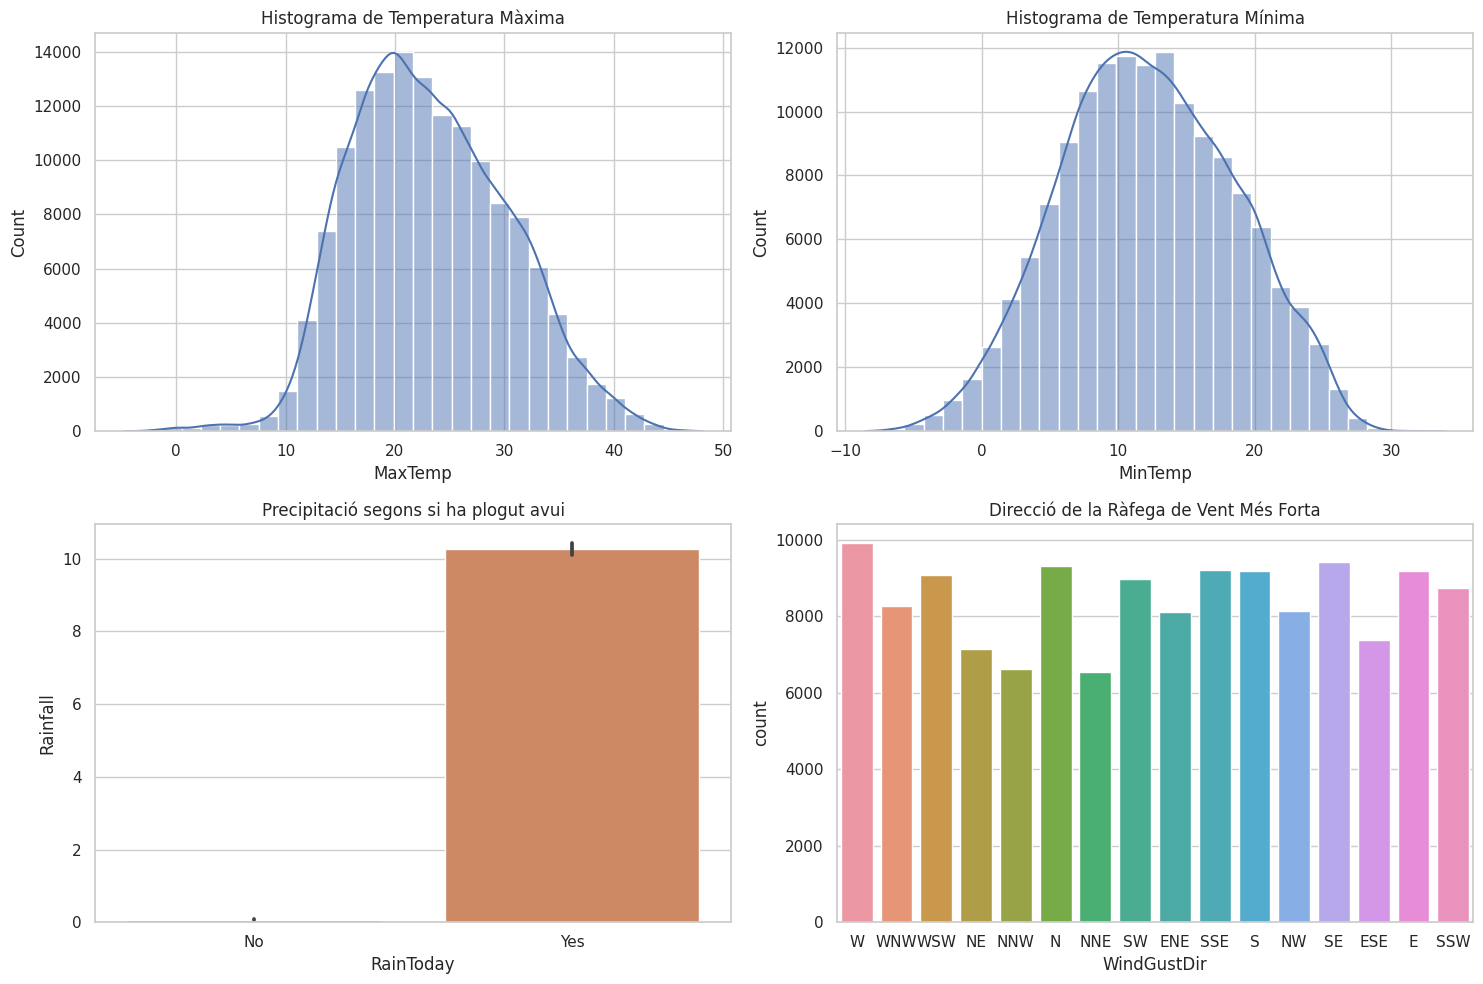

In [ ]:
# Definim un estil per als gràfics
sns.set(style="whitegrid")

# Creem un conjunt de gràfics per visualitzar diferents aspectes de les dades
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Histograma de les temperatures màximes
sns.histplot(df['MaxTemp'], ax=axes[0, 0], bins=30, kde=True)
axes[0, 0].set_title('Histograma de Temperatura Màxima')

# Histograma de les temperatures mínimes
sns.histplot(df['MinTemp'], ax=axes[0, 1], bins=30, kde=True)
axes[0, 1].set_title('Histograma de Temperatura Mínima')

# Gràfic de barres de la precipitació
sns.barplot(x="RainToday", y="Rainfall", data=df, ax=axes[1, 0])
axes[1, 0].set_title('Precipitació segons si ha plogut avui')

# Gràfic de barres de la direcció de la ràfega de vent més forta
sns.countplot(x="WindGustDir", data=df, ax=axes[1, 1])
axes[1, 1].set_title('Direcció de la Ràfega de Vent Més Forta')

plt.tight_layout()
plt.show()

- **Histograma de Temperatura Màxima:** Mostra la distribució de les temperatures màximes registrades. La distribució sembla normal amb la majoria de les temperatures centrades al voltant d'un rang mitjà, disminuint en freqüència cap als extrems més alts i més baixos.

- **Histograma de Temperatura Mínima:** Similar al gràfic de temperatura màxima, mostra la distribució de les temperatures mínimes i també sembla seguir una distribució normal. La majoria de les temperatures mínimes es concentren al voltant d'un valor central, amb menys freqüència a mesura que les temperatures s'allunyen d'aquest centre.

- **Gràfic de Barres de Precipitació segons si ha plogut Avui:** Compara la quantitat mitjana de precipitació en dies que ha plogut i en dies que no. Els dies amb pluja mostren significativament més precipitació, com era d'esperar.

- **Gràfic de Barres de la Direcció de la Ràfega de Vent Més Forta:** Mostra el recompte de dies segons la direcció de la ràfega de vent més forta. Les barres indiquen que certes direccions són més comunes que altres, però no hi ha una direcció dominant que sigui molt més freqüent en comparació amb les altres.

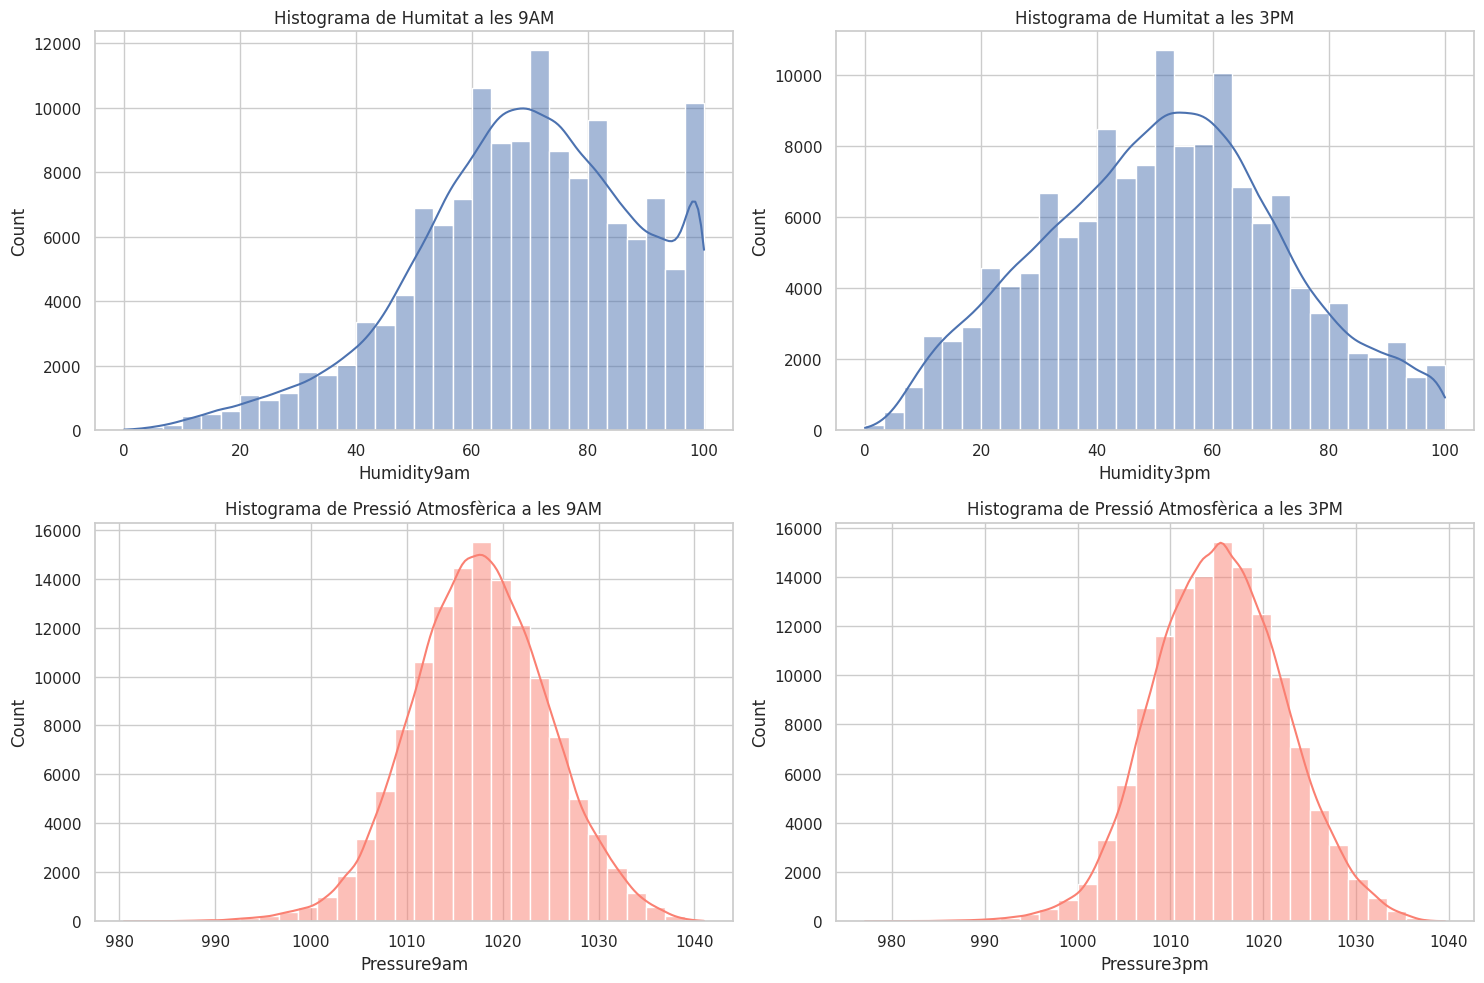

In [ ]:
# Creem un altre conjunt de gràfics per explorar més aspectes de les dades
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Gràfic de la humitat a les 9 del matí
sns.histplot(df['Humidity9am'], ax=axes[0, 0], bins=30, kde=True)
axes[0, 0].set_title('Histograma de Humitat a les 9AM')

# Gràfic de la humitat a les 3 de la tarda
sns.histplot(df['Humidity3pm'], ax=axes[0, 1], bins=30, kde=True)
axes[0, 1].set_title('Histograma de Humitat a les 3PM')

# Gràfic de la pressió atmosfèrica a les 9 del matí
sns.histplot(df['Pressure9am'], ax=axes[1, 0], bins=30, kde=True, color="salmon")
axes[1, 0].set_title('Histograma de Pressió Atmosfèrica a les 9AM')

# Gràfic de la pressió atmosfèrica a les 3 de la tarda
sns.histplot(df['Pressure3pm'], ax=axes[1, 1], bins=30, kde=True, color="salmon")
axes[1, 1].set_title('Histograma de Pressió Atmosfèrica a les 3PM')

plt.tight_layout()
plt.show()

- **Histograma de Humitat a les 9AM:** Mostra la distribució de la humitat al matí. Hi ha una ampla variabilitat, amb la majoria de dades concentrades al voltant del 60-100% d'humitat, el que pot indicar un ambient més humit a primera hora del dia.

- **Histograma de Humitat a les 3PM:** La distribució de la humitat a la tarda sembla més centrada al voltant del 40-70% d'humitat, el que podria reflectir una disminució general de la humitat relativa a mesura que augmenten les temperatures durant el dia.

- **Histograma de Pressió Atmosfèrica a les 9AM:** Aquest gràfic mostra la distribució de la pressió atmosfèrica al matí, amb la majoria de les observacions centrades al voltant de 1010 hPa.

- **Histograma de Pressió Atmosfèrica a les 3PM:** La distribució de la pressió atmosfèrica a la tarda és similar a la del matí, també centrada al voltant de 1010 hPa, indicant poca variació en la pressió atmosfèrica durant el dia.

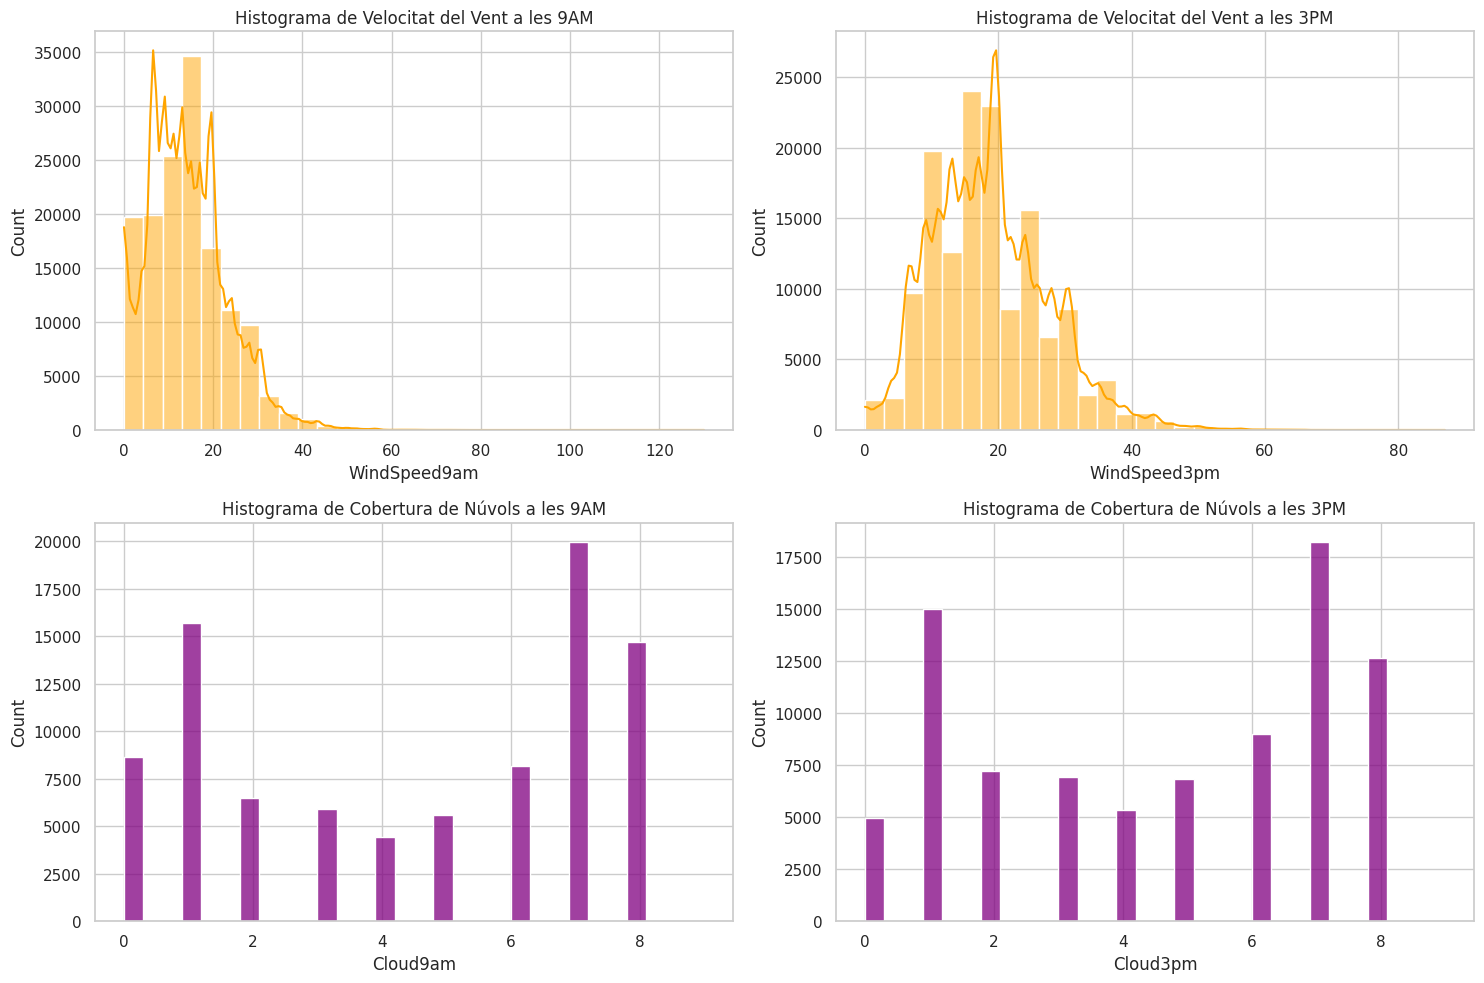

In [ ]:
# Creem més gràfics per explorar altres variables
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Gràfic de la velocitat del vent a les 9 del matí
sns.histplot(df['WindSpeed9am'], ax=axes[0, 0], bins=30, kde=True, color="orange")
axes[0, 0].set_title('Histograma de Velocitat del Vent a les 9AM')

# Gràfic de la velocitat del vent a les 3 de la tarda
sns.histplot(df['WindSpeed3pm'], ax=axes[0, 1], bins=30, kde=True, color="orange")
axes[0, 1].set_title('Histograma de Velocitat del Vent a les 3PM')

# Gràfic de la cobertura de núvols a les 9 del matí
sns.histplot(df['Cloud9am'], ax=axes[1, 0], bins=30, kde=False, color="purple")
axes[1, 0].set_title('Histograma de Cobertura de Núvols a les 9AM')

# Gràfic de la cobertura de núvols a les 3 de la tarda
sns.histplot(df['Cloud3pm'], ax=axes[1, 1], bins=30, kde=False, color="purple")
axes[1, 1].set_title('Histograma de Cobertura de Núvols a les 3PM')

plt.tight_layout()
plt.show()

- **Histograma de Velocitat del Vent a les 9AM:** Mostra que les velocitats més freqüents de vent al matí són baixes, amb una disminució ràpida en la freqüència a mesura que la velocitat del vent augmenta.

- **Histograma de Velocitat del Vent a les 3PM:** Similar al gràfic del matí, però amb una lleugera tendència cap a velocitats de vent més altes a la tarda.

- **Histograma de Cobertura de Núvols a les 9AM:** Indica que és comú tenir poc o cap núvol al matí, amb la presència de dies completament clars (cobertura 0) o parcialment núvols (cobertura 1 a 7).

- **Histograma de Cobertura de Núvols a les 3PM:** Mostra una distribució similar a la del matí, però amb una tendència més pronunciada cap a dies més núvols a la tarda.  La calor diürna pot conduir a la formació de núvols a mesura que el dia avança.

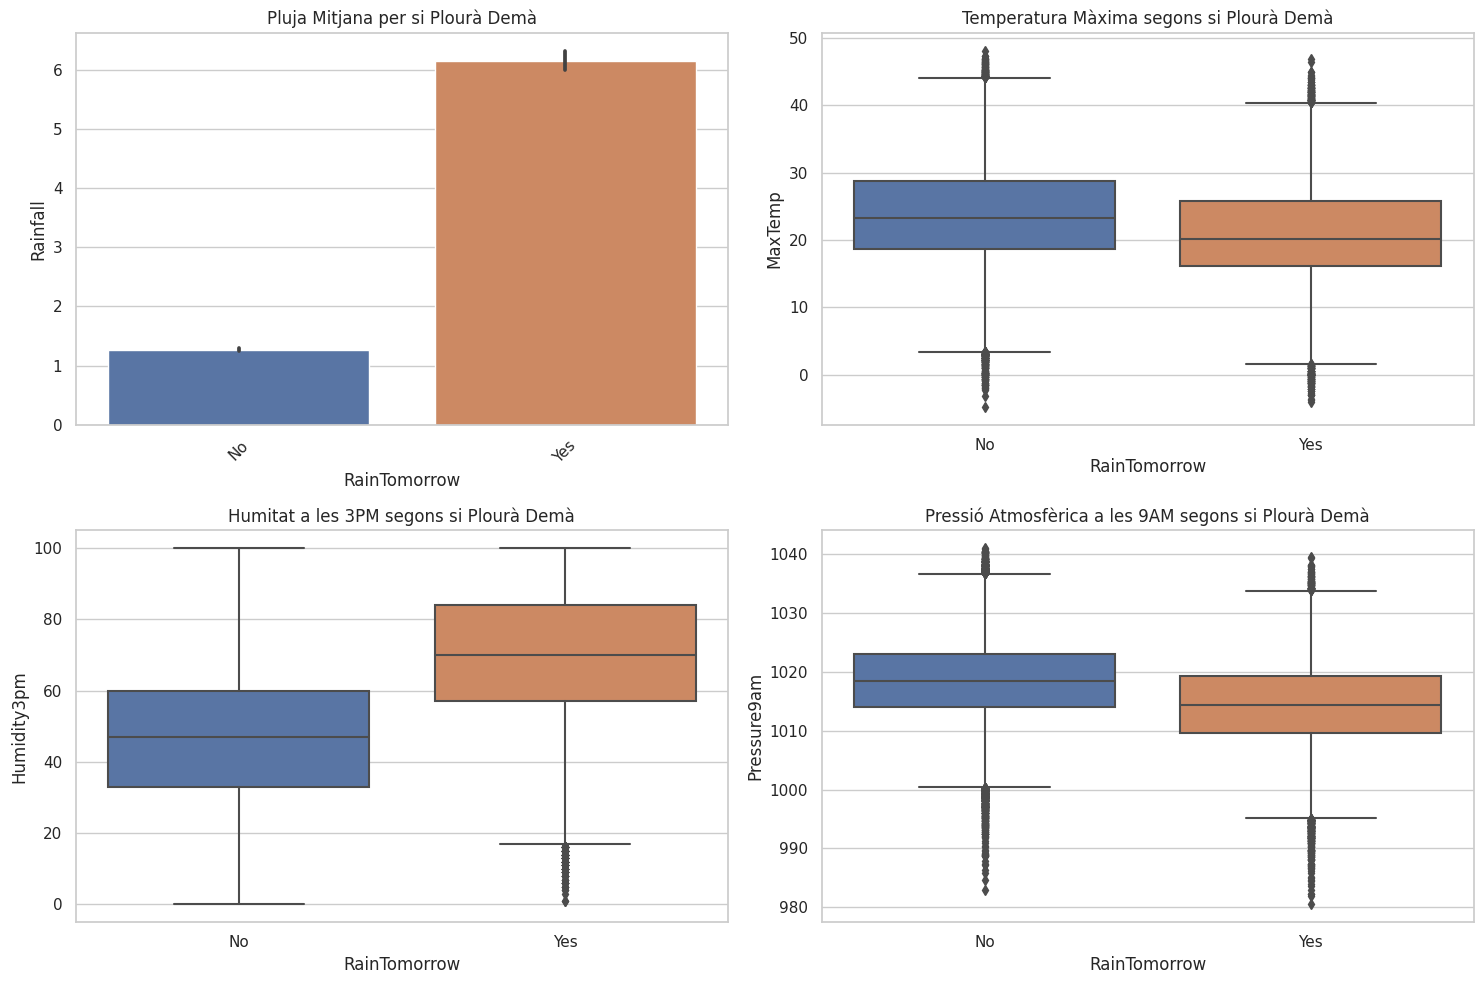

In [ ]:
# Creem encara més gràfics per explorar més variables
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Gràfic de barres de la quantitat mitjana de pluja per ubicació
sns.barplot(x="RainTomorrow", y="Rainfall", data=df, ax=axes[0, 0])
axes[0, 0].set_title('Pluja Mitjana per si Plourà Demà')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45)

# Gràfic de caixa de la temperatura màxima segons si plourà demà
sns.boxplot(x="RainTomorrow", y="MaxTemp", data=df, ax=axes[0, 1])
axes[0, 1].set_title('Temperatura Màxima segons si Plourà Demà')

# Gràfic de caixa de la humitat a les 3PM segons si plourà demà
sns.boxplot(x="RainTomorrow", y="Humidity3pm", data=df, ax=axes[1, 0])
axes[1, 0].set_title('Humitat a les 3PM segons si Plourà Demà')

# Gràfic de caixa de la pressió atmosfèrica a les 9AM segons si plourà demà
sns.boxplot(x="RainTomorrow", y="Pressure9am", data=df, ax=axes[1, 1])
axes[1, 1].set_title('Pressió Atmosfèrica a les 9AM segons si Plourà Demà')

plt.tight_layout()
plt.show()

El conjunt de gràfics de caixa mostra les comparacions segons si es preveu pluja per demà ("RainTomorrow"):

- **Pluja Mitjana:** Hi ha significativament més pluja en els dies previs als que se'n preveu.
- **Temperatura Màxima:** No es mostra una diferència clara en la temperatura màxima entre dies que precedeixen a la pluja i els que no.
- **Humitat a les 3PM:** Els dies previs a la pluja tendeixen a tenir una humitat més alta a les 3PM.
- **Pressió Atmosfèrica a les 9AM:** La pressió a les 9AM no varia significativament entre els dies que precedeixen a la pluja i els que no.






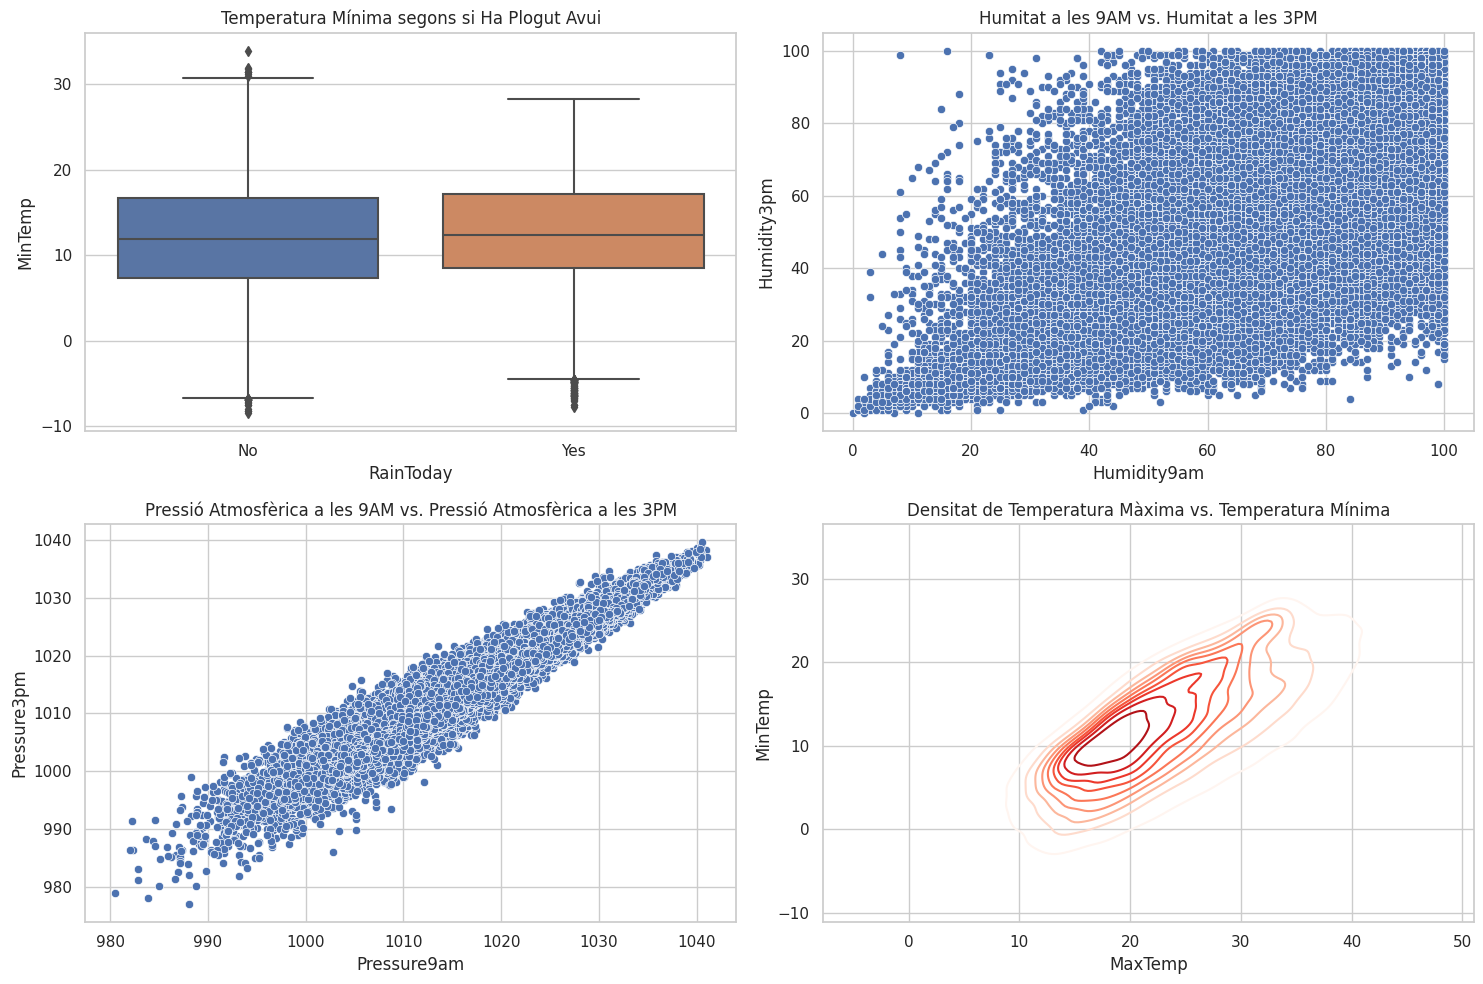

In [ ]:
# Creem més gràfics per explorar altres relacions
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Gràfic de caixa de la temperatura mínima segons si ha plogut avui
sns.boxplot(x="RainToday", y="MinTemp", data=df, ax=axes[0, 0])
axes[0, 0].set_title('Temperatura Mínima segons si Ha Plogut Avui')

# Gràfic de dispersió de la humitat a les 9AM vs. la humitat a les 3PM
sns.scatterplot(x="Humidity9am", y="Humidity3pm", data=df, ax=axes[0, 1])
axes[0, 1].set_title('Humitat a les 9AM vs. Humitat a les 3PM')

# Gràfic de dispersió de la pressió atmosfèrica a les 9AM vs. la pressió atmosfèrica a les 3PM
sns.scatterplot(x="Pressure9am", y="Pressure3pm", data=df, ax=axes[1, 0])
axes[1, 0].set_title('Pressió Atmosfèrica a les 9AM vs. Pressió Atmosfèrica a les 3PM')

# Gràfic de densitat de la temperatura màxima vs. la temperatura mínima
sns.kdeplot(x="MaxTemp", y="MinTemp", data=df, ax=axes[1, 1], cmap="Reds")
axes[1, 1].set_title('Densitat de Temperatura Màxima vs. Temperatura Mínima')

plt.tight_layout()
plt.show()

- **Temperatura mínima segons si ha plogut avui:** mostra que els dies amb pluja tendeixen a tenir temperatures mínimes més altes en comparació amb els dies sense pluja. La variabilitat de les temperatures mínimes també és menor en els dies amb pluja.

- **Humitat a les 9AM vs. Humitat a les 3PM:** mostra un gràfic de dispersió de la humitat en dos moments diferents del dia. Els punts es concentren principalment al llarg d'una línia diagonal des de l'angle inferior esquerre fins al superior dret, indicant que hi ha una tendència per a que els nivells d'humitat a les 9AM siguin similars als de les 3PM. No obstant això, també hi ha una considerable dispersió, especialment per humitats més altes al matí, que no sempre es corresponen amb humitats igualment altes a la tarda. Això pot reflectir el fet que l'humitat pot disminuir durant el dia a mesura que les temperatures augmenten.

- **Pressió Atmosfèrica a les 9AM vs. Pressió Atmosfèrica a les 3PM:** presenta un patró molt clar de correlació positiva entre les pressions atmosfèriques registrades a les 9AM i les 3PM. Els punts formen un grup dens i allargat al llarg d'una línia diagonal. Això indica que els valors de pressió són molt similars entre aquestes dues hores. Aquest patró suggereix que la pressió atmosfèrica és relativament estable al llarg del dia en la majoria dels casos, amb poques variacions extremes. Aquesta estabilitat en la pressió és típica en dies sense canvis meteorològics significatius.

- **Densitat de Temperatura Màxima vs. Temperatura Mínima:** Aquest gràfic mostra una correlació forta i positiva entre les temperatures màximes i mínimes, amb la major concentració de dades indicant que les temperatures mínimes moderades solen correspondre a temperatures màximes també moderades. La zona de major densitat, on els contorns són més foscos i més propers, suggereix que la majoria de les observacions tenen temperatures mínimes en el rang de 10 a 20 graus Celsius i màximes de 20 a 30 graus Celsius. Això sol ser indicatiu d'un clima temperat on hi ha una variació diària de temperatura relativament consistent. Les àrees on la densitat de contorns és menor reflecteixen combinacions de temperatures mínimes i màximes que són menys freqüents, com ara dies extremadament freds o calorosos.

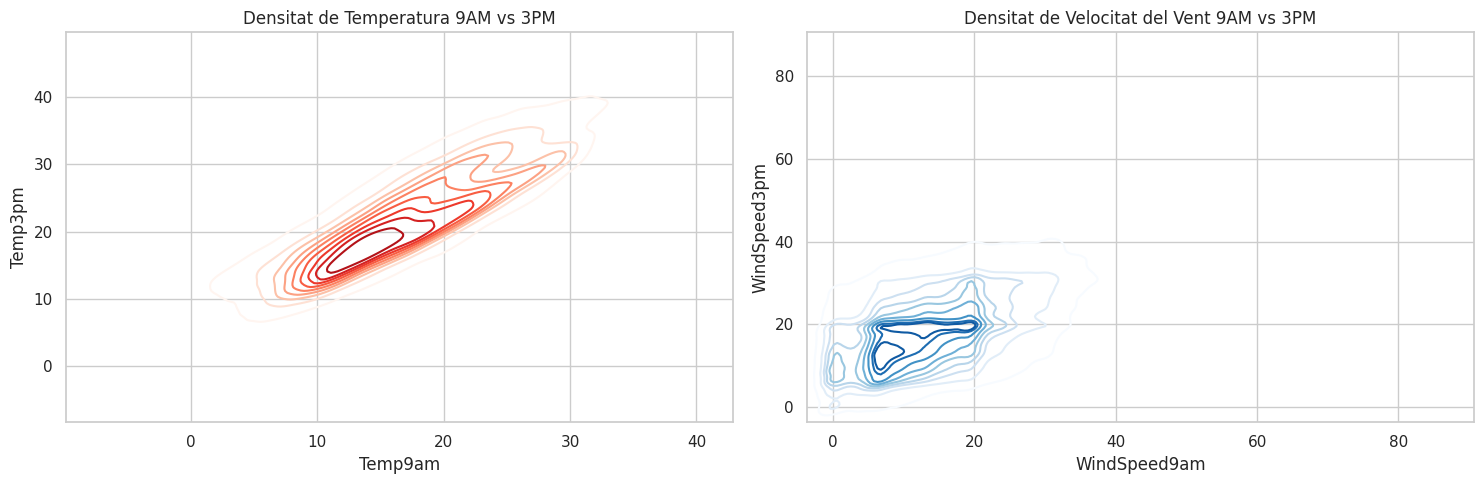

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Gràfic de densitat de la temperatura a les 9AM vs la temperatura a les 3PM
sns.kdeplot(data=df, x="Temp9am", y="Temp3pm", ax=axes[0], cmap="Reds")
axes[0].set_title('Densitat de Temperatura 9AM vs 3PM')

# Gràfic de densitat de la velocitat del vent a les 9AM vs la velocitat del vent a les 3PM
sns.kdeplot(data=df, x="WindSpeed9am", y="WindSpeed3pm", ax=axes[1], cmap="Blues")
axes[1].set_title('Densitat de Velocitat del Vent 9AM vs 3PM')

plt.tight_layout()
plt.show()

- **Densitat de Temperatura 9AM vs 3PM:** Aquest gràfic de densitat mostra que hi ha una relació positiva entre la temperatura a les 9AM i la temperatura a les 3PM, cosa que significa que, en general, quan la temperatura és alta al matí, també tendeix a ser alta a la tarda. La major densitat (zones més fosques) s'observa al voltant de la franja mitjana de temperatures. Això indica que la majoria de dies tenen temperatures moderades tant al matí com a la tarda. Hi ha menys densitat als extrems, cosa que suggereix que els dies molt freds o molt calorosos són menys freqüents.

- **Densitat de Velocitat del Vent 9AM vs 3PM:** El segon gràfic mostra també una relació positiva entre la velocitat del vent a les 9AM i a les 3PM. La major densitat està concentrada al voltant de velocitats de vent més baixes a les 9AM que augmenten lleugerament a les 3PM. Això podria indicar que els vents tendeixen a ser més suaus al matí i augmenten al llarg del dia. No obstant això, hi ha menys densitat en les velocitats del vent més altes, cosa que indica que els dies amb vents forts són menys comuns.

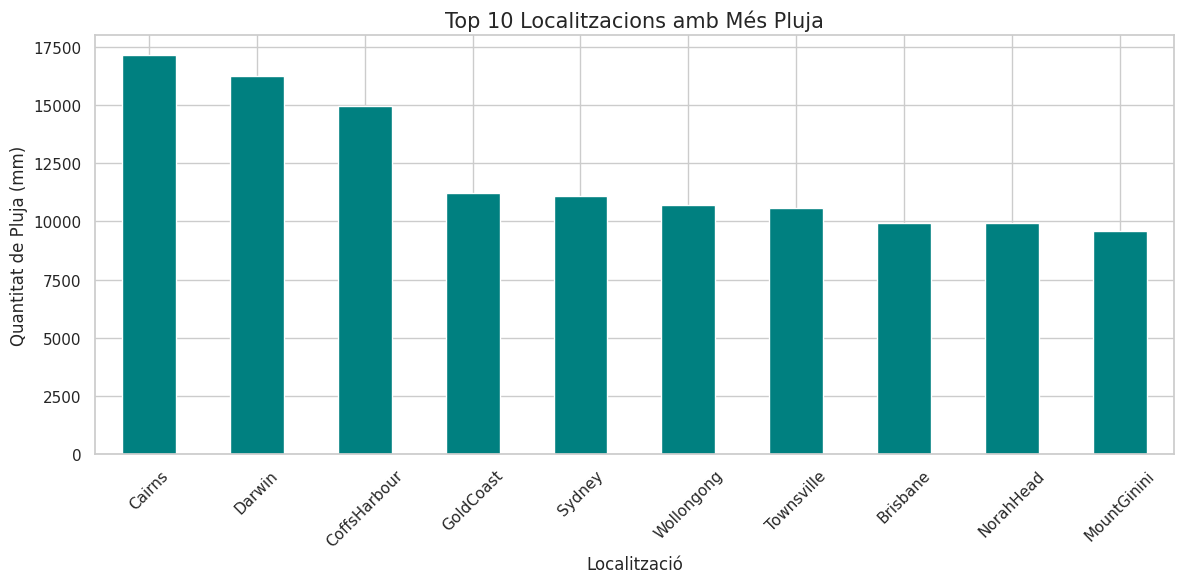

In [ ]:
#Quantitat de pluja per localització
rainfall_by_location = df.groupby('Location')['Rainfall'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
rainfall_by_location.plot(kind='bar', color='teal')
plt.title('Top 10 Localitzacions amb Més Pluja', fontsize=15)
plt.xlabel('Localització', fontsize=12)
plt.ylabel('Quantitat de Pluja (mm)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()


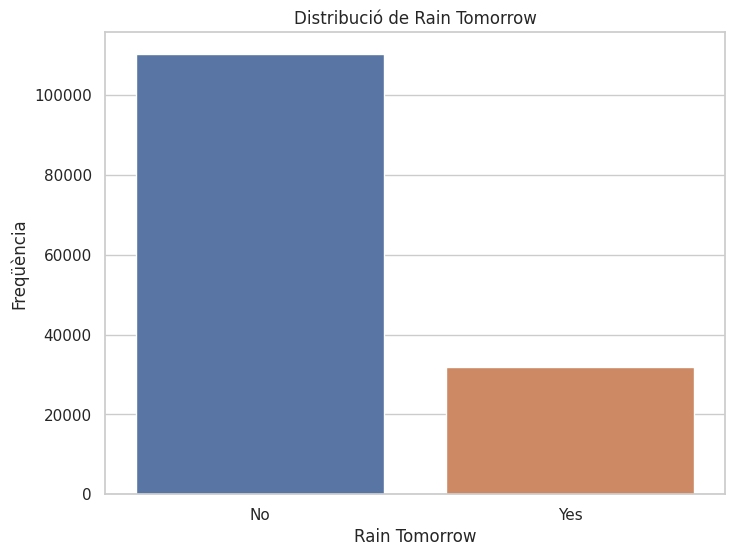

In [ ]:
sns.set_style("whitegrid")

# Distribució de RainTomorrow
rain_tomorrow_counts = df['RainTomorrow'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=rain_tomorrow_counts.index, y=rain_tomorrow_counts.values)
plt.title('Distribució de Rain Tomorrow')
plt.xlabel('Rain Tomorrow')
plt.ylabel('Freqüència')
plt.show()

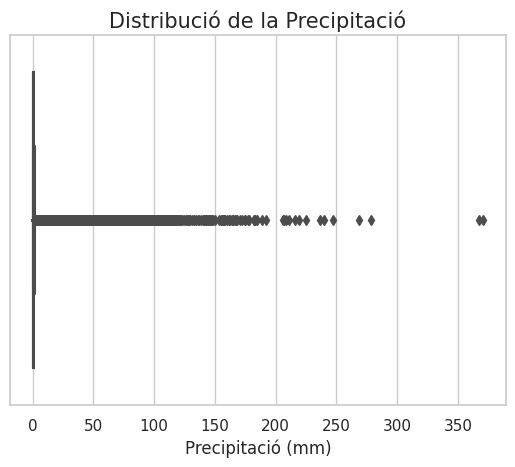

In [ ]:
# Gràfic de caixa per la precipitació
plt.figure()
sns.boxplot(x='Rainfall', data=df)
plt.title('Distribució de la Precipitació', fontsize=15)
plt.xlabel('Precipitació (mm)', fontsize=12)
plt.show()

Text(0.5, 1.0, 'Gràfic de barres del nombre de característiques numèriques')

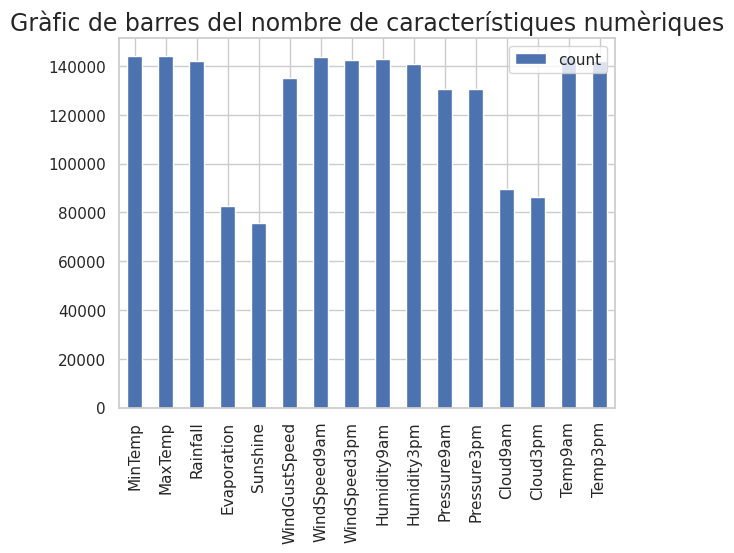

In [ ]:
#Diagrama de barres per comprovar el nombre d'entrades numèriques
dT=d.T
dT.plot.bar(y='count')
plt.title("Gràfic de barres del nombre de característiques numèriques",fontsize=17)

<ipython-input-21-301a3b23d464>:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_correlation.corr()


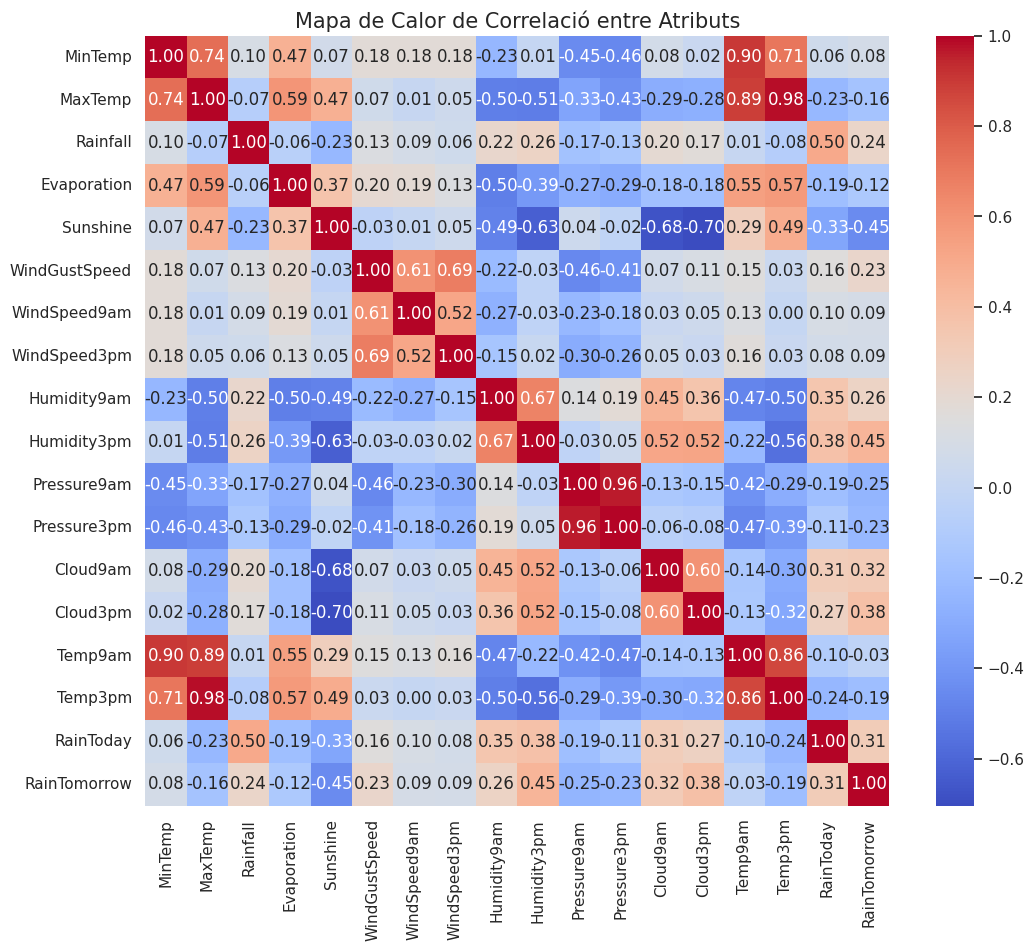

In [ ]:
# Converteix les dades no numèriques a numèriques per a l'anàlisi de correlació
df_correlation = df.copy()

# Converteix 'RainTomorrow' a numèric: No=0, Yes=1
df_correlation['RainTomorrow'] = df_correlation['RainTomorrow'].map({'No': 0, 'Yes': 1})

# Converteix 'RainToday' a numèric: No=0, Yes=1
df_correlation['RainToday'] = df_correlation['RainToday'].map({'No': 0, 'Yes': 1})

# Calcula la matriu de correlació
correlation_matrix = df_correlation.corr()

# Creació d'un gràfic de calor per correlacions entre variables
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlació entre Atributs', fontsize=15)
plt.show()

El mapa de calor de correlació mostra la força i direcció de la relació entre parells de variables meteorològiques. Colors més càlids (vermells) indiquen una correlació positiva, mentre que els colors més freds (blaus) indiquen una correlació negativa. La variable objectiu "RainTomorrow" mostra correlacions moderades amb "Humidity3pm", "Cloud3pm", i "Pressure3pm", suggerint que aquests factors podrien ser importants per predir la pluja.

# **NANS AND DATA PREPROCESSING**

In [ ]:
#Mirem si el dataset te o no te nans
def has_nans(df):
  return df.isna().sum().sum()>0

print (has_nans(df))

True


Un cop sabem que el nostre dataset conté Nans, podem mirar els Nans desde el punt de vista de les columnes o desde el punt de vista de les files.

Pel que fa a les files, podem mirar quin percentatge de l'informació de cada fila conté Nans.

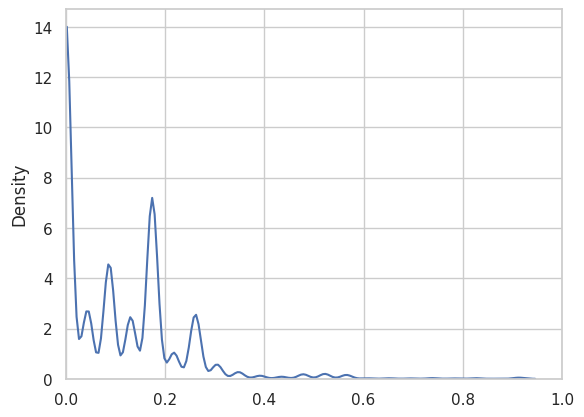

In [ ]:
percent_nan_fila = df.isna().mean(axis = 1)
percent_nan_fila
sns.kdeplot(percent_nan_fila)
plt.xlim(0,1)
plt.show()

Podem veure representat gràficament com estan distribuïts els percentatges de valors nuls a les files del conjunt de dades.

In [ ]:
def get_percentage_nan_per_column(df):
  #retorna un df amb el % de nans de cada columna
  return df.isna().sum().sort_values()/len(df)*100.

percentage_nan = get_percentage_nan_per_column(df)
percentage_nan
#Les columnes que tenen un % molt alt de nans, cal que les treguem.

Date              0.000000
Location          0.000000
MaxTemp           0.866905
MinTemp           1.020899
Temp9am           1.214767
WindSpeed9am      1.214767
Humidity9am       1.824557
WindSpeed3pm      2.105046
Rainfall          2.241853
RainToday         2.241853
RainTomorrow      2.245978
Temp3pm           2.481094
WindDir3pm        2.906641
Humidity3pm       3.098446
WindGustSpeed     7.055548
WindGustDir       7.098859
WindDir9am        7.263853
Pressure3pm      10.331363
Pressure9am      10.356799
Cloud9am         38.421559
Cloud3pm         40.807095
Evaporation      43.166506
Sunshine         48.009762
dtype: float64

In [ ]:
def print_percentage_nan(percentage_nan):
  #printeja l'informacio de % de nans de cada columna
  for col,percentage in percentage_nan.to_dict().items():
    print (col,percentage)
print_percentage_nan(percentage_nan)

Date 0.0
Location 0.0
MaxTemp 0.8669049910628353
MinTemp 1.0208992162793895
Temp9am 1.214766946239516
WindSpeed9am 1.214766946239516
Humidity9am 1.8245565791282825
WindSpeed3pm 2.105046060772721
Rainfall 2.2418534304963567
RainToday 2.2418534304963567
RainTomorrow 2.245978275814657
Temp3pm 2.4810944589577892
WindDir3pm 2.906641000962464
Humidity3pm 3.09844630826344
WindGustSpeed 7.055547916953114
WindGustDir 7.098858792795271
WindDir9am 7.263852605527293
Pressure3pm 10.331362573903478
Pressure9am 10.356799120033
Cloud9am 38.42155919153032
Cloud3pm 40.80709473394747
Evaporation 43.166506256015396
Sunshine 48.00976213391998


Primer de tot fem un histograma on es mostren les variables Cloud9am i Cloud3pm en funció de si la variable Sunshine té valors Nans o no.

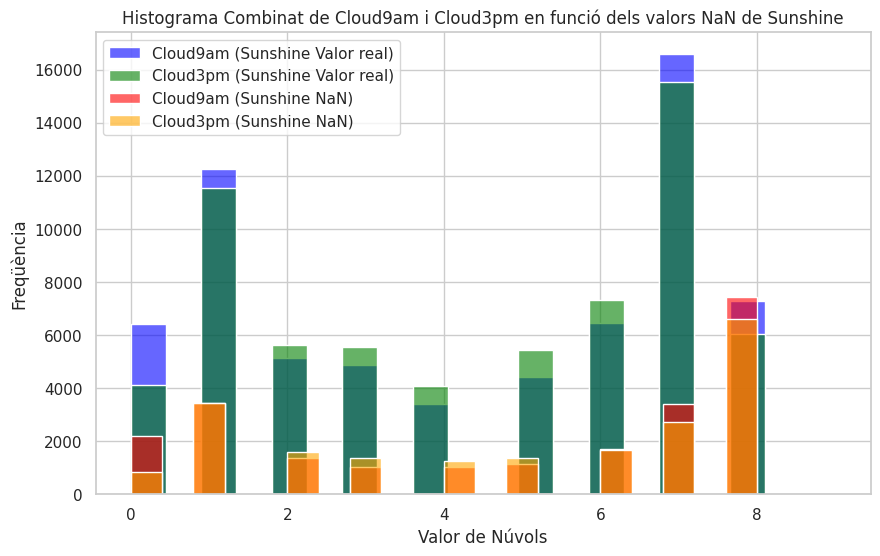

In [ ]:
df_copia2 = df.copy()

# Creem un histograma combinat
plt.figure(figsize=(10, 6))

# Creem una columna binària per indicar si Sunshine és NaN o no
df_copia2['Sunshine_isna'] = df_copia2['Sunshine'].isna()

# Filtrem les dades per aquestes dues condicions
sunshine_present = df_copia2[df_copia2['Sunshine_isna'] == False]
sunshine_absent = df_copia2[df_copia2['Sunshine_isna'] == True]

# Histograma de Cloud9am i Cloud3pm quan Sunshine no és NaN
sns.histplot(sunshine_present['Cloud9am'], kde=False, bins=20, color="blue", label='Cloud9am (Sunshine Valor real)', alpha=0.6)
sns.histplot(sunshine_present['Cloud3pm'], kde=False, bins=20, color="green", label='Cloud3pm (Sunshine Valor real)', alpha=0.6)

# Histograma de Cloud9am i Cloud3pm quan Sunshine és NaN
sns.histplot(sunshine_absent['Cloud9am'], kde=False, bins=20, color="red", label='Cloud9am (Sunshine NaN)', alpha=0.6)
sns.histplot(sunshine_absent['Cloud3pm'], kde=False, bins=20, color="orange", label='Cloud3pm (Sunshine NaN)', alpha=0.6)

plt.title('Histograma Combinat de Cloud9am i Cloud3pm en funció dels valors NaN de Sunshine')
plt.xlabel('Valor de Núvols')
plt.ylabel('Freqüència')
plt.legend()

plt.show()

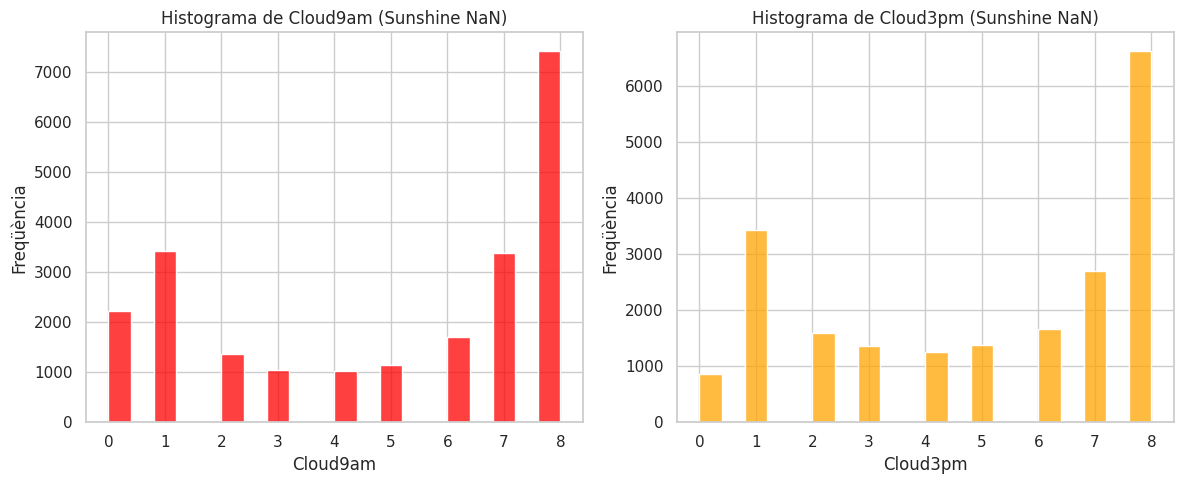

In [ ]:
# Creem dos histogrames, un per a Cloud9am i l'altre per a Cloud3pm, quan Sunshine és NaN
plt.figure(figsize=(12, 5))

# Histograma de Cloud9am quan Sunshine és NaN
plt.subplot(1, 2, 1)
sns.histplot(sunshine_absent['Cloud9am'], kde=False, bins=20, color="red")
plt.title('Histograma de Cloud9am (Sunshine NaN)')
plt.xlabel('Cloud9am')
plt.ylabel('Freqüència')

# Histograma de Cloud3pm quan Sunshine és NaN
plt.subplot(1, 2, 2)
sns.histplot(sunshine_absent['Cloud3pm'], kde=False, bins=20, color="orange")
plt.title('Histograma de Cloud3pm (Sunshine NaN)')
plt.xlabel('Cloud3pm')
plt.ylabel('Freqüència')

plt.tight_layout()
plt.show()


A partir d'aquests gràfics i l'anterior, podem veure la freqüència de diferents nivells de coberta de núvols al matí i a la tarda en dies sense dades de radiació solar.

Com que hi ha una concentració notable de valors alts en aquestes columnes quan Sunshine és NaN, això ens indica que, efectivament, hi ha una tendència a que en dies de cel més tapat, faltin dades de Sunshine.

Per tant, hi ha una relació entre els dies en què la variable Sunshine és NaN i el nivell de coberta de núvols (Cloud9am i Cloud3pm).

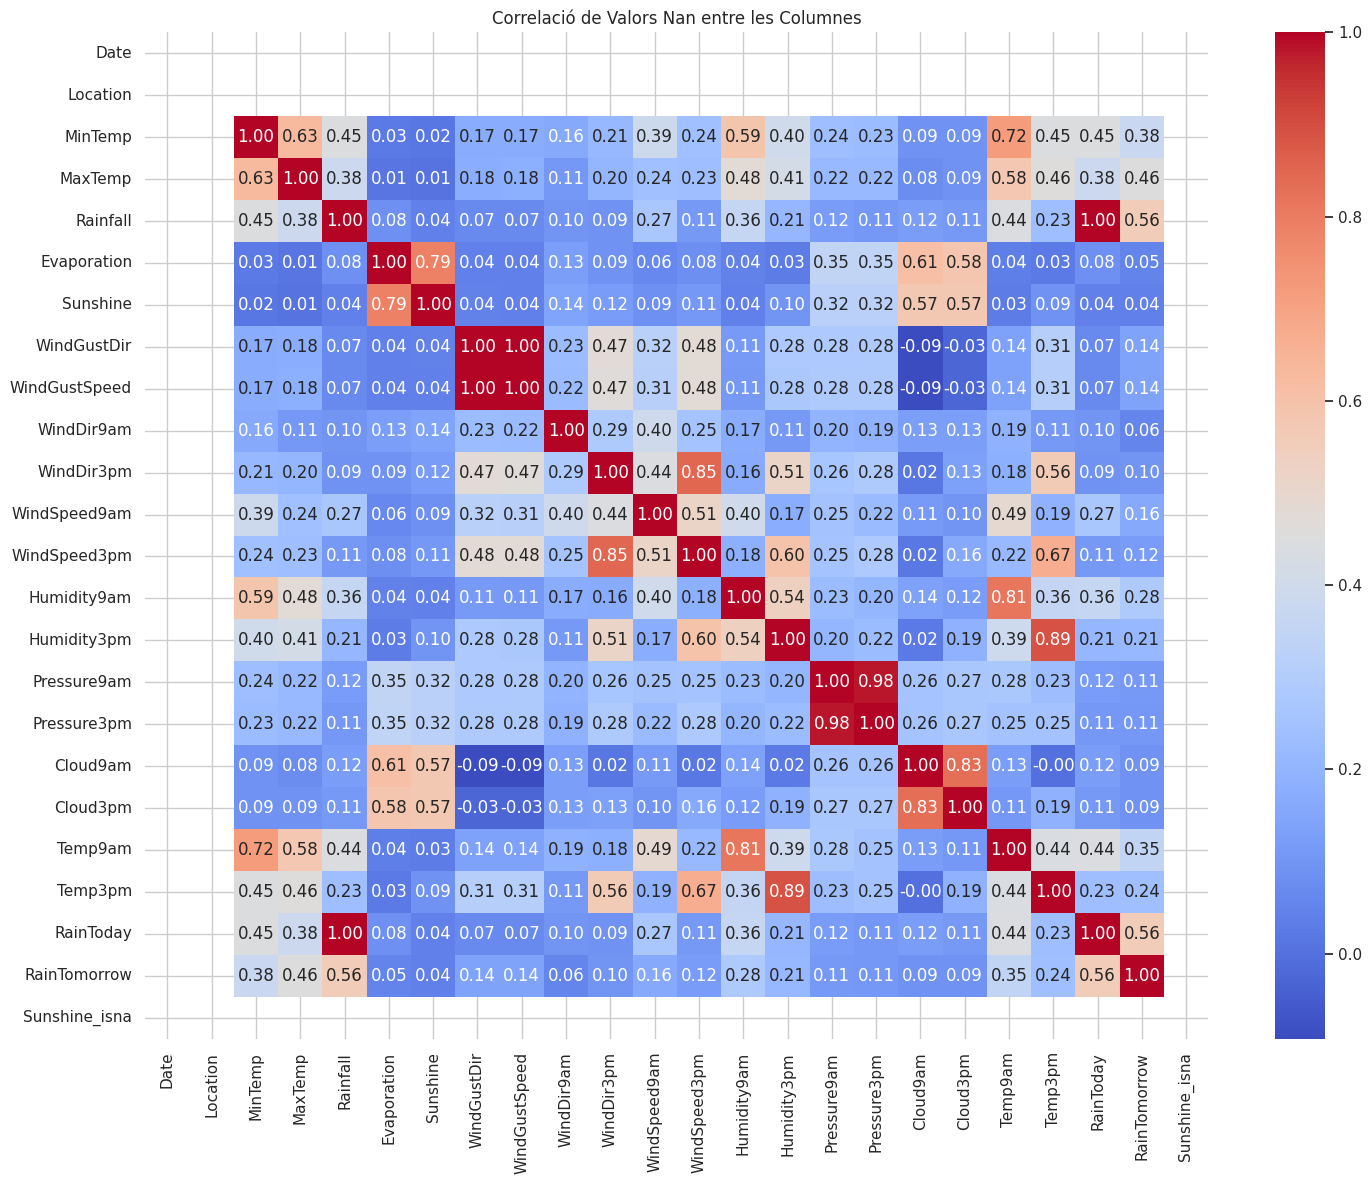

In [ ]:
# Creem un dataframe per mostrar la correlació de valors NaN entre les columnes
nan_corr_matrix = df_copia2.isna().corr()
nan_corr_matrix.head(10)  # Mostrem només les primeres 10 columnes per una millor visualització

# Configurem les dimensions de la figura
plt.figure(figsize=(15, 12))

# Creem un mapa de calor per visualitzar la correlació de NaNs
sns.heatmap(nan_corr_matrix, cmap='coolwarm', annot=True, fmt=".2f")

# Mostrem el títol i ajustar el layout
plt.title('Correlació de Valors Nan entre les Columnes')
plt.tight_layout()

# Mostrem la figura
plt.show()

Podem observar, per exemple, que Evaporation i Sunshine tenen una correlació elevada de valors NaNs, indicant que quan falta un valor en una, sovint també falta en l'altra.
Relacions similars es poden observar entre WindGustDir i WindGustSpeed, entre Rainfall i RainToday, i entre Humidity i Temp.

Com que les columnes MaxTemp, MinTemp, Temp9am, WindSpeed9am, Humidity9am, WindSpeed3pm, Rainfall, RainToday, RainTomorrow, Temp3pm, WindDir3pm i Humidity3pm només tenen algunes poques files amb Nans, eliminem aquestes files del dataset.

In [ ]:
#Fem una còpia del dataset original per si ens fa falta recuperar-lo més endavant.
df_copy = df.copy()

# Esborrem les files on hi ha valors NaN de les variables amb menys percentatge de Nans.
df_netejat = df_copy.dropna(subset=['MaxTemp', 'MinTemp', 'Temp9am', 'WindSpeed9am', 'Humidity9am', 'WindSpeed3pm', 'Rainfall', 'RainToday', 'RainTomorrow', 'Temp3pm', 'WindDir3pm', 'Humidity3pm'])

# Mostrem les dimensions dels dataframes original i netejat per veure quantes files s'han eliminat
dimensions_original = df_copy.shape
dimensions_netejat = df_netejat.shape

# Mostra les primeres files del dataset netejat
df_netejat.head(), dimensions_original, dimensions_netejat

(         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
 0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
 1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
 2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
 3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
 4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   
 
   WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
 0           W           44.0          W  ...        71.0         22.0   
 1         WNW           44.0        NNW  ...        44.0         25.0   
 2         WSW           46.0          W  ...        38.0         30.0   
 3          NE           24.0         SE  ...        45.0         16.0   
 4           W           41.0        ENE  ...        82.0         33.0   
 
    Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
 0 

Ara creem tres columnes noves a partir de la columna Date: Year, Month i Season. Cal tenir en compte que les estacions a Austràlia són diferents de les de l'hemisferi nord:

- Estiu: de desembre a febrer
- Tardor: de març a maig
- Hivern: de juny a agost
- Primavera: de setembre a novembre

In [ ]:
# Creem una còpia independent del DataFrame per evitar SettingWithCopyWarning
df_netejat = df_netejat.copy()

# Convertim la columna 'Date' a un tipus de dades de data-hora
df_netejat['Date'] = pd.to_datetime(df_netejat['Date'])

# Definim una funció per assignar cada mes a la seva estació corresponent
def month_to_season(month):
    if month in [12, 1, 2]:
        return 'Summer'  # Estiu
    elif month in [3, 4, 5]:
        return 'Autumn'  # Tardor
    elif month in [6, 7, 8]:
        return 'Winter'  # Hivern
    else:
        return 'Spring'  # Primavera

# Utilitzem .loc[] per assignar els nous valors
df_netejat.loc[:, 'Year'] = df_netejat['Date'].dt.year
df_netejat.loc[:, 'Month'] = df_netejat['Date'].dt.month
df_netejat.loc[:, 'Season'] = df_netejat['Month'].apply(month_to_season)

# Opcional: Eliminem la columna original 'Date' si ja no la necessitem
df_netejat = df_netejat.drop(['Date'], axis=1)

# Mostrem les primeres files per confirmar la creació de la columna 'Season'
df_netejat[['Year', 'Month', 'Season']].head()

Year  Month  Season
0  2008     12  Summer
1  2008     12  Summer
2  2008     12  Summer
3  2008     12  Summer
4  2008     12  Summer

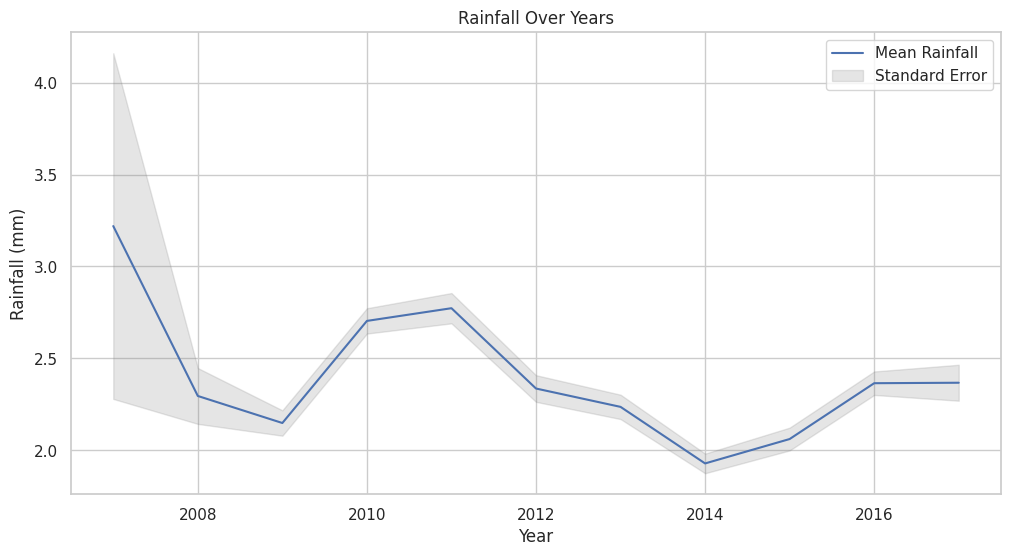

In [ ]:
# Suposem que df és el vostre DataFrame i que ja conté les columnes 'Year' i 'Rainfall'
# Aquí, agruparem per 'Year' i calcularem la mitjana i la desviació estàndard de 'Rainfall'
yearly_data = df_netejat.groupby('Year')['Rainfall'].agg(['mean', 'std', 'count']).reset_index()

# Ara, calculem l'error estàndard de la mitjana (SEM) per tenir la mida correcta de les barres d'error
yearly_data['sem'] = yearly_data['std'] / np.sqrt(yearly_data['count'])

# Crear la gràfica
plt.figure(figsize=(12, 6))

# Traçar la línia de la mitjana
plt.plot(yearly_data['Year'], yearly_data['mean'], label='Mean Rainfall')

# Afegir les barres d'error com a zona ombra, utilitzant l'error estàndard de la mitjana
plt.fill_between(yearly_data['Year'],
                 yearly_data['mean'] - yearly_data['sem'],
                 yearly_data['mean'] + yearly_data['sem'],
                 color='gray', alpha=0.2, label='Standard Error')

plt.title('Rainfall Over Years')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.legend()

# Mostrar la gràfica
plt.show()


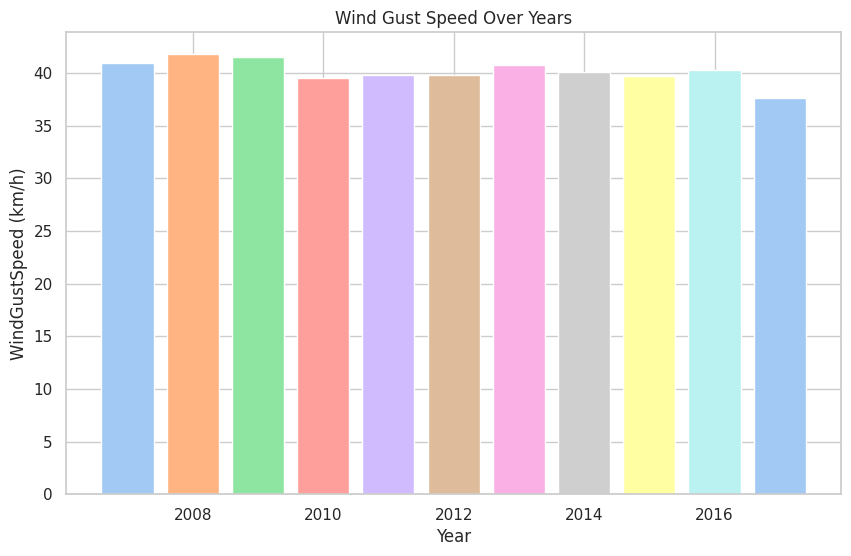

In [ ]:
# Calcular la mitjana de la velocitat de les ratxes de vent per any
wind_gust_by_year = df_netejat.groupby('Year')['WindGustSpeed'].mean().reset_index()

# Obtenir una paleta de colors de Seaborn
palette = sns.color_palette("pastel")  # O qualsevol altra paleta que t'agradi

# Assegurar-se que la llista de colors sigui prou gran alternant els colors
colors = [palette[i % len(palette)] for i in range(len(wind_gust_by_year))]

# Crear la gràfica de barres utilitzant Matplotlib i els colors de la paleta
plt.figure(figsize=(10, 6))
plt.bar(wind_gust_by_year['Year'], wind_gust_by_year['WindGustSpeed'], color=colors)

plt.title('Wind Gust Speed Over Years')
plt.xlabel('Year')
plt.ylabel('WindGustSpeed (km/h)')

# Mostrar la gràfica
plt.show()

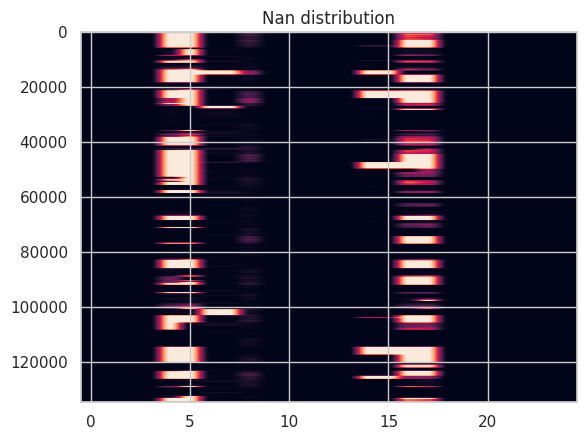

Using 9 cols


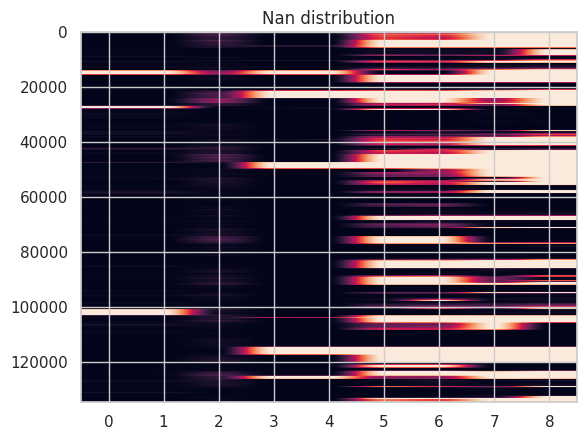

In [ ]:
def get_cols_with_na(df):
  isna = df.isna().sum().sort_values()
  isna = isna[isna>0]
  cols = isna.index
  return cols

def filter_df_just_na(df):
  cols = get_cols_with_na(df)
  print (f'Using {len(cols)} cols')
  return df[cols]

def plot_nan_distribution(df,just_na_cols = False):
  if just_na_cols:
    df = filter_df_just_na(df)
  plt.imshow(df.isna(),aspect = 'auto')
  plt.title('Nan distribution')
  plt.show()

plot_nan_distribution(df_netejat)
plot_nan_distribution(df_netejat,just_na_cols = True)

In [ ]:
from sklearn.cluster import KMeans

def get_unique_sim_nan_v2(df,tol = 0.1):
  df = filter_df_just_na(df)
  X = 1*df.isna().T
  for n in range(1,X.shape[0]+1):
    km = KMeans(n_clusters = n,n_init = 10)
    km.fit(X)
    if km.inertia_<tol:
      print (f'There are {n} clusters')
      break
  return

get_unique_sim_nan_v2(df_netejat)

Using 9 cols
There are 9 clusters


In [ ]:
tmp = filter_df_just_na(df_netejat)
isna = get_percentage_nan_per_column(tmp)
print_percentage_nan(isna)

Using 9 cols
WindGustSpeed 4.45872650271194
WindGustDir 4.468385466973772
WindDir9am 5.614830225128167
Pressure3pm 8.285162344899325
Pressure9am 8.332714168957574
Cloud9am 37.2754290809124
Cloud3pm 38.30299427892116
Evaporation 41.68288877331154
Sunshine 45.957351957797755


Creem noves columnes com promig de pluges i la pluja de 3 dies anteriors per tal de poder entrenar millor el model.

In [ ]:
# Agrupem les dades per 'Location' i ordenem per any, mes i season
df_netejat.sort_values(by=['Location', 'Year', 'Month', 'Season'], inplace=True)

# Creem les columnes per pluja en dies anteriors
for i in range(1, 4):  # Creant columnes per 1, 2, i 3 dies enrere
    column_name = f'Rain{i}DaysAgo'
    df_netejat[column_name] = df_netejat.groupby('Location')['RainToday'].shift(i)

# Creem les columnes de promig de pluja utilitzant rolling()
window_sizes = {'RainLastWeek': 7, 'RainLast2Weeks': 14, 'RainLastMonth': 30, 'RainLast2Months': 60}
for column_name, window_size in window_sizes.items():
    df_netejat[column_name] = df_netejat.groupby('Location')['Rainfall'].rolling(window=window_size).mean().reset_index(level=0, drop=True)

# Eliminem les files amb valors nuls creats com a resultat del desplaçament i del rolling
df_netejat.dropna(subset=['Rain1DaysAgo', 'Rain2DaysAgo', 'Rain3DaysAgo',
                          'RainLastWeek', 'RainLast2Weeks', 'RainLastMonth', 'RainLast2Months'], inplace=True)

# Visualitzem les primeres files per confirmar els canvis
df_netejat.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
96404  Adelaide      9.5     16.8       6.2          2.6      10.5   
96405  Adelaide      6.4     19.4       0.0          3.4       9.4   
96406  Adelaide      7.5     23.9       0.0          3.0      11.0   
96407  Adelaide     14.0     28.0       0.0          5.6      11.5   
96408  Adelaide     14.3     33.7       0.0          NaN      10.0   

      WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  Year  Month  \
96404          SW           35.0          W         SW  ...  2008      9   
96405         NNE           28.0         NW         NW  ...  2008      9   
96406         NNW           41.0          N        WNW  ...  2008      9   
96407         NNW           39.0          N        NNW  ...  2008      9   
96408           W           65.0          N        NNW  ...  2008      9   

       Season  Rain1DaysAgo  Rain2DaysAgo  Rain3DaysAgo  RainLastWeek  \
96404  Spring            No            No           Yes      1.114286   
96405  Spring           Yes            No            No      1.114286   
96406  Spring            No           Yes            No      1.114286   
96407  Spring            No            No           Yes      1.114286   
96408  Spring            No            No            No      0.885714   

       RainLast2Weeks  RainLastMonth  RainLast2Months  
96404        0.928571       0.913333         2.766667  
96405        0.857143       0.913333         2.683333  
96406        0.857143       0.913333         2.670000  
96407        0.857143       0.866667         2.670000  
96408        0.785714       0.800000         2.670000  

[5 rows x 32 columns]

In [ ]:
# Preparació de les dades
target = 'RainTomorrow'
X = df_netejat.drop(target, axis=1)
y = df_netejat[target]=="Yes"

In [ ]:
# Separació en conjunts de train i test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Visualitzem les dimensions dels conjunts obtinguts
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((105359, 31), (26340, 31), (105359,), (26340,))

In [ ]:
y_train

113212    False
123820    False
121354    False
39074     False
118983    False
          ...  
72546     False
22838     False
27707     False
6008      False
61861     False
Name: RainTomorrow, Length: 105359, dtype: bool

In [ ]:
X_train

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
113212    Witchcliffe      6.4     17.1       0.6          NaN       NaN   
123820          Perth     10.9     19.6       0.0          3.2       6.5   
121354          Perth      6.9     18.0       0.0          1.2       6.2   
39074      WaggaWagga      8.7     21.6       2.6          6.0      11.3   
118983   PerthAirport      7.0     24.4       0.0          4.0      11.2   
...               ...      ...      ...       ...          ...       ...   
72546         Mildura     20.3     38.7       0.0         11.0      12.0   
22838   NorfolkIsland     18.2     22.6       0.4          1.6       2.8   
27707        Richmond      8.5     20.0       0.0          0.8       NaN   
6008    BadgerysCreek      5.4     20.7       0.0          NaN       NaN   
61861            Sale     10.3     22.1       0.2          3.4       7.6   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  Year  Month  \
113212           S           28.0        ENE        SSE  ...  2013      8   
123820         NaN            NaN        SSE         SE  ...  2017      6   
121354          NW           22.0        NNE        WNW  ...  2010      6   
39074           SW           35.0         SW        SSW  ...  2016      3   
118983          SW           37.0          E        SSW  ...  2012     10   
...            ...            ...        ...        ...  ...   ...    ...   
72546          ESE           30.0          N        ENE  ...  2015      2   
22838            E           30.0          E          E  ...  2013     12   
27707            N           30.0        NaN          N  ...  2010      6   
6008            SW           30.0        WSW          S  ...  2017      5   
61861            E           37.0          E          E  ...  2010     11   

        Season  Rain1DaysAgo  Rain2DaysAgo  Rain3DaysAgo  RainLastWeek  \
113212  Winter           Yes           Yes           Yes      6.914286   
123820  Winter           Yes            No            No      3.742857   
121354  Winter           Yes           Yes            No      2.714286   
39074   Autumn           Yes            No            No      2.571429   
118983  Spring           Yes           Yes            No      0.742857   
...        ...           ...           ...           ...           ...   
72546   Summer            No            No            No      0.000000   
22838   Summer            No            No            No      0.057143   
27707   Winter            No            No            No      0.000000   
6008    Autumn           Yes            No            No      0.171429   
61861   Spring            No            No            No      0.228571   

        RainLast2Weeks  RainLastMonth  RainLast2Months  
113212        9.428571       7.206667         8.976667  
123820        1.871429       2.540000         1.616667  
121354        1.357143       2.820000         1.793333  
39074         1.742857       1.080000         1.536667  
118983        0.685714       2.240000         2.393333  
...                ...            ...              ...  
72546         0.042857       0.020000         0.960000  
22838         2.314286       4.286667         2.440000  
27707         0.014286       2.766667         1.483333  
6008          0.157143       0.153333         3.210000  
61861         0.571429       1.880000         1.136667  

[105359 rows x 31 columns]

In [ ]:
def add_binary_nan_columns(df,remove_duplicates = True):
  cols_with_nan = get_cols_with_na(df)
  for col in cols_with_nan:
    df[f'{col}_isna'] = df[col].isna()
  if remove_duplicates:
    df = df.loc[:,~df.apply(lambda x: x.duplicated(),axis=1).all()]
  return df

X_train = add_binary_nan_columns(X_train)

CREEM UNA PIPELINE QUE FACI NORMALITZACIÓ, PCA, KNNIMPUTER I TARGET ENCODER.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
! pip install category-encoders
import category_encoders
from category_encoders.target_encoder import TargetEncoder

# Identificar les columnes numèriques i categòriques
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

#X_train_reduced = X_train[:2000]
#y_train_reduced = y_train[:2000]

# Pipeline per a les dades numèriques: Imputació + Escalat + PCA
numerical_pipeline = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5)),
    ('scaler', StandardScaler())
])

#,('pca', PCA(n_components=0.95))

# Pipeline per a les dades categòriques: Imputació + Target Encoding
categorical_pipeline = Pipeline(steps=[
    ('encoder', TargetEncoder()),
    ('imputer', KNNImputer(n_neighbors=5))
])

# Preprocessador que aplica les pipelines corresponents a cada tipus de dada
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_pipeline, numerical_cols),
    ('cat', categorical_pipeline, categorical_cols)
])

# Pipeline completa
full_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.3 MB/s eta 0:00:00


In [ ]:
# Apliquem la pipeline al conjunt d'entrenament

#X_train_processed = full_pipeline.fit_transform(X_train_reduced, y_train_reduced)
X_train_processed = full_pipeline.fit_transform(X_train, y_train)

X_test_processed = full_pipeline.transform(X_test)

# Mida del conjunt d'entrenament processat amb la pipeline
X_train_processed.shape
X_test_processed.shape

(26340, 31)

In [ ]:
y_train

113212    False
123820    False
121354    False
39074     False
118983    False
          ...  
72546     False
22838     False
27707     False
6008      False
61861     False
Name: RainTomorrow, Length: 105359, dtype: bool

In [ ]:
X_train_processed

array([[-0.90064861, -0.86517292, -0.20636351, ...,  0.33375932,
         0.29791401,  0.28359667],
       [-0.19369389, -0.50943813, -0.27796676, ...,  0.33375932,
         0.19862219,  0.20267677],
       [-0.82209809, -0.7371084 , -0.27796676, ...,  0.33375932,
         0.29791401,  0.20267677],
       ...,
       [-0.57073641, -0.45252056, -0.27796676, ...,  0.18836403,
         0.19862219,  0.20267677],
       [-1.05774966, -0.35291482, -0.27796676, ...,  0.33375932,
         0.19862219,  0.20267677],
       [-0.28795452, -0.15370334, -0.25409901, ...,  0.18836403,
         0.19862219,  0.20267677]])

In [ ]:
categorical_cols

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday',
       'Season', 'Rain1DaysAgo', 'Rain2DaysAgo', 'Rain3DaysAgo'],
      dtype='object')

In [ ]:
numerical_cols

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'Year', 'Month', 'RainLastWeek', 'RainLast2Weeks',
       'RainLastMonth', 'RainLast2Months'],
      dtype='object')

In [ ]:
from joblib import dump
dump(X_train_processed, 'X_train_new.joblib')
dump(X_test_processed, 'X_test_new.joblib')
dump(y_train, 'y_train.joblib')
dump(y_test, 'y_test.joblib')

['y_test.joblib']

In [ ]:
from joblib import load
X_train_new = load('X_train_new.joblib')
X_test_new = load('X_test_new.joblib')
y_train = load('y_train.joblib')
y_test = load('y_test.joblib')

In [ ]:
#Tornem a mirar si el dataset té o no té nans. En aquest cas, KNNImputer ens converteix les dades en una matriu NumPy.
#Per aquest motiu, la funció per comprovar si hi ha valors NaN en una matriu NumPy és diferent.
def has_nans(np_array):
    return np.isnan(np_array).sum() > 0

# Comprovem si hi ha valors NaN en les dades imputades
print("Valors NaN X_train:", has_nans(X_train_new))
print("Valors NaN X_test:", has_nans(X_test_new))

Valors NaN X_train: False
Valors NaN X_test: False


Ara ja no tenim Nans al nostre conjunt de dades. Ja podem passar a la part de selecció de la millor mètrica.

# **METRIC SELECTION**

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_new,y_train)
print(lr.coef_)

y_pred = lr.predict(X_train_new)

[[-0.04658061  0.11517717  0.05918696 -0.01227979 -0.47173882  0.71810515
  -0.1428753  -0.19982894  0.0199735   0.97813215  0.82255984 -1.13164095
   0.00403046  0.26198488  0.18515996 -0.039938   -0.01669323  0.04026417
  -0.04935588  0.02395286 -0.00701045  0.05564172 -0.2265283   0.27993016
   1.429605    3.06308133  1.73885487  1.48110844  0.30101819  0.87567315
   0.20060192]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#Analitzem els resultats (confusion matrix, precision, recall, f1)
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

conf = confusion_matrix(y_train,y_pred)

prec,rec,f1, sup = precision_recall_fscore_support(y_train,y_pred)

# Imprimir els resultats
print("Confusion Matrix:")
print(conf)
print("\nPrecision, Recall, F1-Score:")
print("-> Precision:", prec)
print("-> Recall:", rec)
print("-> F1-Score:", f1)

Confusion Matrix:
[[77564  4536]
 [11259 12000]]

Precision, Recall, F1-Score:
-> Precision: [0.87324229 0.7256894 ]
-> Recall: [0.9447503  0.51592932]
-> F1-Score: [0.90758997 0.60309084]


#### **Matriu de confusió:**

- **Veritables Positius (VP):** 77293
- **Falsos Negatius (FN):** 11788
- **Veritables Negatius (VN):** 11471
- **Falsos Positius (FP):** 4807

#### **Precisió, Recall i F1-Score:**

- La **precisió** per la classe 'True' és de 0.70, el que indica que quan el model prediu pluja, és correcte aproximadament el 70% de les vegades.

- El **recall** per la classe 'True' és de 0.49, el que indica que només es detecten el 49% dels dies plujosos reals.

- El **F1-Score** per la classe 'True' és de 0.58, que és una mesura del balanç entre la precisió i el recall.



Els valors indiquen que el model té una precisió més alta per a la classe negativa (no plourà demà) que per a la classe positiva (plourà demà), amb un recall més alt també per a la classe negativa. La puntuació F1, que equilibra la precisió i el recall, és relativament alta per a la classe negativa i més baixa per a la classe positiva. Això indica que el model té una tendència a predir millor els dies sense pluja que els dies amb pluja.

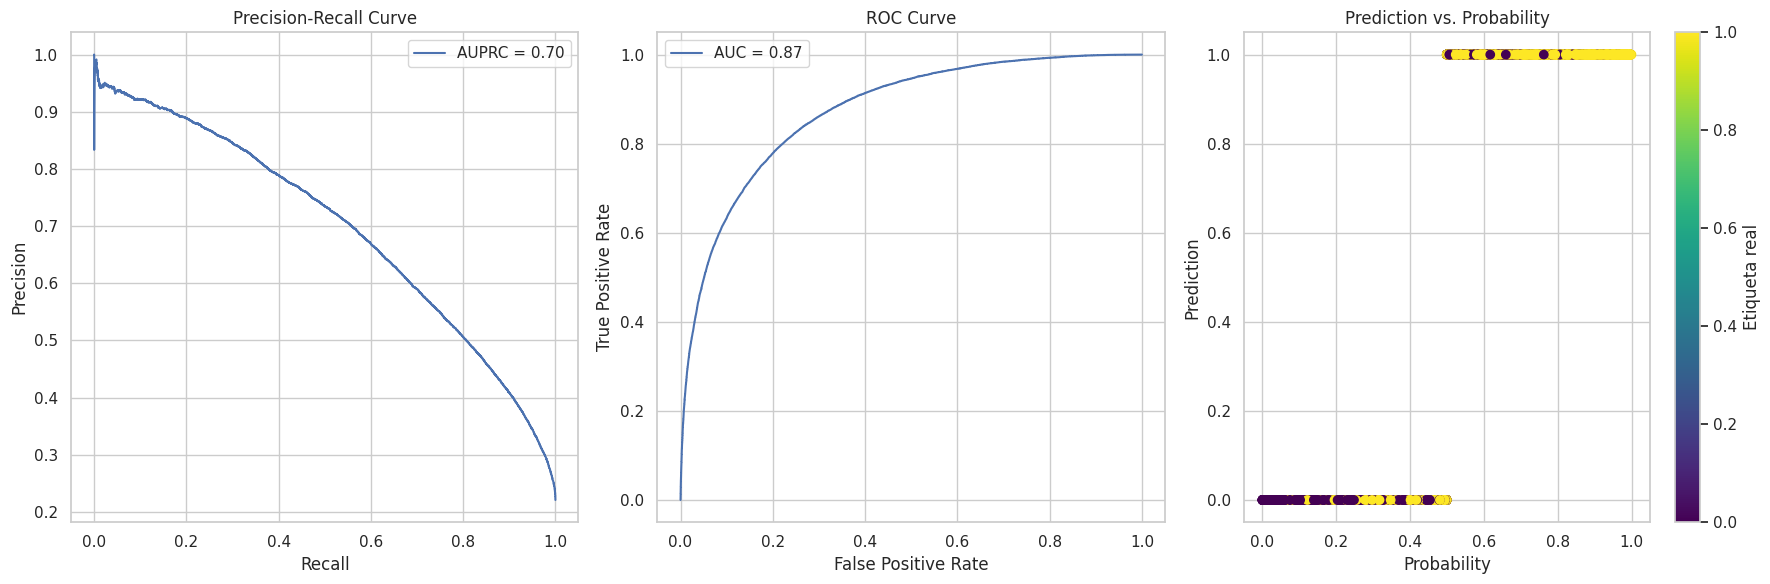

In [ ]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc, roc_auc_score

def plot_analysis_results(X, y, y_prob, y_pred):
    # Creem una figura amb tres subplots disposats de costat
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Precisió-Recall Curve
    precision, recall, _ = precision_recall_curve(y, y_prob)
    axes[0].plot(recall, precision)
    axes[0].set_xlabel('Recall')
    axes[0].set_ylabel('Precision')
    axes[0].set_title('Precision-Recall Curve')
    axes[0].grid(True)
    auc_pr = auc(recall, precision)
    axes[0].legend([f'AUPRC = {auc_pr:.2f}'])

    # ROC Curve
    fpr, tpr, _ = roc_curve(y, y_prob)
    auc_roc = roc_auc_score(y, y_prob)
    axes[1].plot(fpr, tpr, label=f'AUC = {auc_roc:.2f}')
    axes[1].set_xlabel('False Positive Rate')
    axes[1].set_ylabel('True Positive Rate')
    axes[1].set_title('ROC Curve')
    axes[1].legend([f'AUC = {auc_roc:.2f}'])

    # Gràfic de Predicció vs Probabilitat de la classe 1
    scatter = axes[2].scatter(y_prob, y_pred, c=y, cmap='viridis')
    axes[2].set_xlabel('Probability')
    axes[2].set_ylabel('Prediction')
    axes[2].set_title('Prediction vs. Probability')

    # Afegim una barra de color per representar les etiquetes reals
    cbar = plt.colorbar(scatter, ax=axes[2])
    cbar.set_label('Etiqueta real')

    # Mostra les gràfiques
    plt.tight_layout()
    plt.show()

# Calculem les probabilitats predites pel model
y_prob = lr.predict_proba(X_train_new)[:, 1]

plot_analysis_results(X_train_new, y_train, y_prob, y_pred)

#### **Corbes ROC i Precision-Recall:**

- L'**AUC** per la **corba ROC** és de 0.86, el que és bastant alt i indica una bona capacitat discriminatòria general del model.

- L'**AUPRC** per la **corba Precision-Recall** és de 0.67, que és un valor moderat. Aquesta mesura és particularment important en datasets amb un desequilibri significatiu de classes, com és sovint el cas en la predicció de pluja.

En aquest treball, per tant, escolliré com a millor mètrica la AUPRC ja que és molt sensible als 1ns.

In [ ]:
from sklearn.metrics import classification_report

# Generem el classification_report
report = classification_report(y_train,y_pred)
print(report)

              precision    recall  f1-score   support

       False       0.87      0.94      0.91     82100
        True       0.73      0.52      0.60     23259

    accuracy                           0.85    105359
   macro avg       0.80      0.73      0.76    105359
weighted avg       0.84      0.85      0.84    105359



#### **Classification Report:**

L'informe de classificació mostra que el model és bastant precís en general, amb una exactitud global del 84%. Tot i així, el model té una tendència a predir millor els dies que no plou:

- **Dies sense pluja (False):** El model és molt eficient al predir dies sense pluja, amb una alta precisió (87%) i un alt recall (94%), el que indica que la majoria de les prediccions de dies sense pluja són correctes i que capta la majoria d'aquests dies reals.

- **Dies amb pluja (True):** La precisió és més baixa per la predicció de pluja (70%), i el recall és significativament més baix (49%), el que significa que mentre la majoria de les prediccions de pluja són correctes, el model no és tan bo a l'hora de captar tots els casos reals de pluja.

- **Puntuacions F1:** La puntuació F1 és alta per a la classe False (0.90) i moderada per a la classe True (0.58), reflectint que hi ha un equilibri millor entre precisió i recall en la predicció de dies sense pluja comparat amb dies amb pluja.

- **Mitjanes:** Les mitjanes macro i ponderades mostren un rendiment general bo del model, però també indiquen que hi ha espai per millorar, especialment en la detecció de casos reals de pluja (True).

# **MODEL SELECTION WITH CROSS VALIDATION**

S'han considerat 6 models: LogisticRegression, LGBMClassifier, XGBClassifier, AdaBoostClassifier i KNeighborsClassifier. Aquests models representen diferents tipus d'algorismes d'aprenentatge automàtic, cobrint ensemble methods, k veïns més propers i gradient boosting. Aquesta diversitat serveix per obtenir una idea més completa del que podria funcionar millor en aquest conjunt de dades.

In [ ]:
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold  #, TimeSeriesSplit #També es podria utilitzar VaiesianSerachCV
from sklearn.metrics import make_scorer, average_precision_score
import time

# Diccionari que emmagatzemarà les prediccions i el temps
preds = {'train': {}, 'test': {}, 'time': {}}

# Inicialitza el diccionari que emmagatzemarà els resultats ROC AUC
resultats = {}

# Crea un marcador personalitzat utilitzant average_precision_score per AUPRC
auprc_scorer = make_scorer(average_precision_score, greater_is_better=True, needs_proba=True)

# Definim un objecte TimeSeriesSplit per a la validació creuada
#tscv = TimeSeriesSplit(n_splits=10)
skf = StratifiedKFold(n_splits=10)

# Models i hiperparàmetres per a la cerca en quadrícula
models_params = {
    'LogisticRegression': {
        'model': LogisticRegression(max_iter=1000),
        'params': {'C': [0.01, 0.1, 1, 10]}
    },
    'RandomForest': {
        'model': RandomForestClassifier(),
        'params': {'max_depth': [3, 4, 5], 'n_estimators': [50, 100, 200]}
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
    },
    'LGBM': {
        'model': LGBMClassifier(verbose=-1),
        'params': {'max_depth': [3, 4, 5], 'n_estimators': [50, 100, 200]}
    },
    'XGB': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss'), #, tree_method='hist', device='cuda'),
        'params': {'max_depth': [3, 4, 5], 'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}
    },
    'AdaBoostClassifier': {
        'model': AdaBoostClassifier(),
        'params': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]}
    }
}

# Inicialitzem un diccionari addicional per emmagatzemar els objectes GridSearchCV
grid_search_objects = {}

# Cerca en quadrícula per a cada model
for model_name, mp in models_params.items():
    start_time = time.time()
    grid_search = GridSearchCV(mp['model'], mp['params'], scoring=auprc_scorer, cv= skf)
    grid_search.fit(X_train_new, y_train)
    grid_search_objects[model_name] = grid_search  # Emmagatzemem l'objecte GridSearchCV
    preds['train'][model_name] = grid_search.predict(X_train_new)
    preds['test'][model_name] = grid_search.predict(X_test_new)
    preds['time'][model_name] = time.time() - start_time
    resultats[model_name] = grid_search.best_score_
    print(f"Millors hiperparàmetres per a {model_name}: {grid_search.best_params_}")

# Mostra els resultats
print(f"Resultats AUPRC per a cada model: {resultats}")
print(f"Temps d'execució per a cada model: {preds['time']}")
millor_model = max(resultats, key=resultats.get)
print(f"El millor model segons la mètrica AUPRC és: {millor_model} amb una puntuació de {resultats[millor_model]}")


Millors hiperparàmetres per a LogisticRegression: {'C': 10}
Millors hiperparàmetres per a RandomForest: {'max_depth': 5, 'n_estimators': 200}
Millors hiperparàmetres per a KNN: {'n_neighbors': 7, 'weights': 'distance'}
Millors hiperparàmetres per a LGBM: {'max_depth': 5, 'n_estimators': 200}
Millors hiperparàmetres per a XGB: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}
Millors hiperparàmetres per a AdaBoostClassifier: {'learning_rate': 1, 'n_estimators': 200}
Resultats AUPRC per a cada model: {'LogisticRegression': 0.6970009585777069, 'RandomForest': 0.6829087545293079, 'KNN': 0.6695353831886269, 'LGBM': 0.7503989009941167, 'XGB': 0.756380227878523, 'AdaBoostClassifier': 0.7134465739682005}
Temps d'execució per a cada model: {'LogisticRegression': 75.98532748222351, 'RandomForest': 737.1510136127472, 'KNN': 273.4061703681946, 'LGBM': 143.52469396591187, 'XGB': 335.1453778743744, 'AdaBoostClassifier': 1733.791310787201}
El millor model segons la mètrica AUPRC és: XGB amb

# **FINAL ANALISIS**

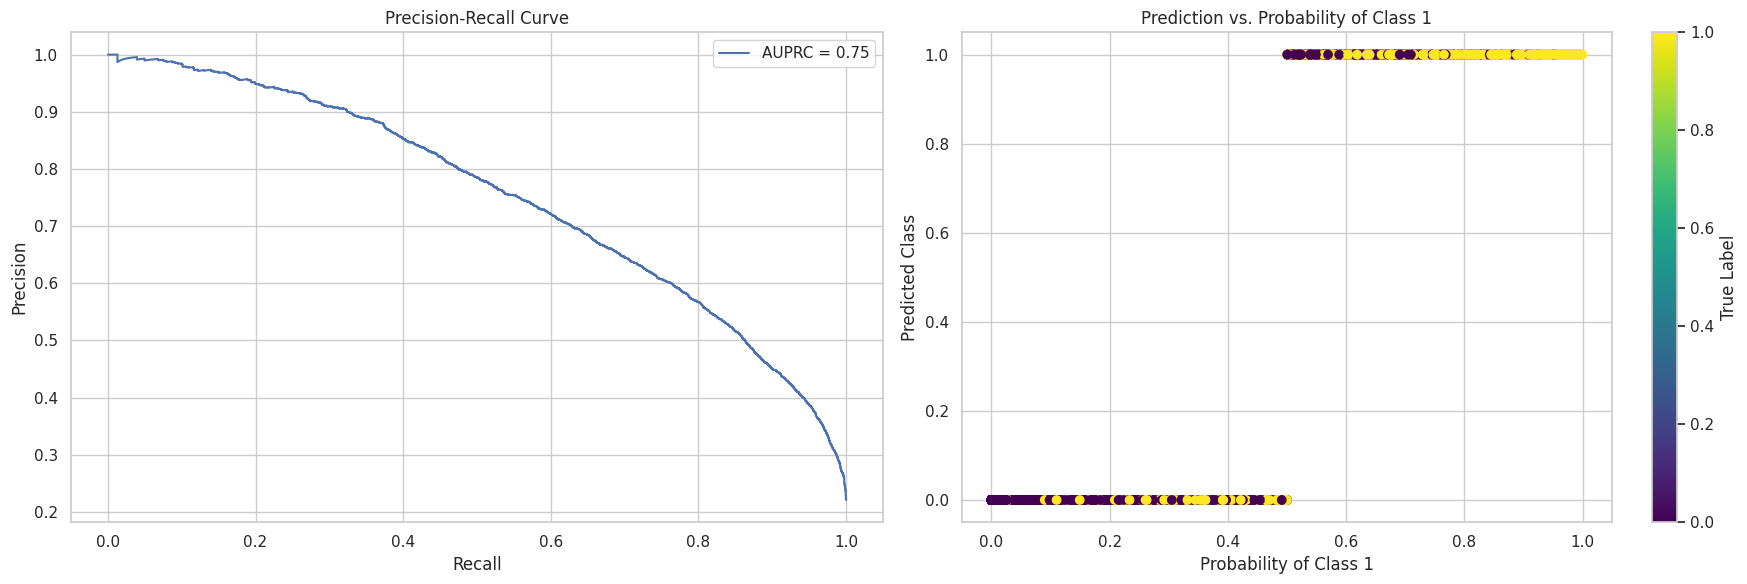

In [ ]:
from sklearn.metrics import precision_recall_curve, auc

# Sabem que XGBClassifier és el millor model
xgb_best_model = grid_search_objects['XGB'].best_estimator_

def plot_analysis_results(X, y, y_prob, y_pred):
    # Creem una figura amb dos subplots disposats de costat
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))

    # PR Curve
    precision, recall, thresholds = precision_recall_curve(y, y_prob[:, 1])
    auprc = auc(recall, precision)
    axes[0].plot(recall, precision, label=f'AUPRC = {auprc:.2f}')
    axes[0].set_xlabel('Recall')
    axes[0].set_ylabel('Precision')
    axes[0].set_title('Precision-Recall Curve')
    axes[0].legend()

    # Gràfic de Predicció vs Probabilitat de la classe 1
    scatter = axes[1].scatter(y_prob[:, 1], y_pred, c=y, cmap='viridis')
    axes[1].set_xlabel('Probability of Class 1')
    axes[1].set_ylabel('Predicted Class')
    axes[1].set_title('Prediction vs. Probability of Class 1')

    # Afegim una barra de color per representar les etiquetes reals
    cbar = plt.colorbar(scatter, ax=axes[1])
    cbar.set_label('True Label')

    # Mostra les gràfiques
    plt.tight_layout()
    plt.show()

    return precision, recall, thresholds

# Utilitzem xgb_best_model per fer prediccions i visualitzacions
y_prob = xgb_best_model.predict_proba(X_test_new)
y_pred = xgb_best_model.predict(X_test_new)
precision, recall, thresholds = plot_analysis_results(X_test_new, y_test, y_prob, y_pred)


- **Corba Precision-Recall:** El model té una AUPRC de 0.72, indicant una millora respecte al valor 0.67 d'abans i un equilibri raonable entre precisió i recall dins del context del problema de classificació. Aquest valor és especialment rellevant en situacions on la classe positiva (la que volem predir) és menys freqüent, com podria ser la predicció de dies de pluja. Una AUPRC més alta s'associaria amb una millor capacitat del model per distingir entre les classes positiva i negativa.

- **Gràfic de Probabilitat vs. Classe Predita:** podem observar que el model tendeix a tenir una alta confiança en les seves prediccions per a la classe negativa (la majoria de les probabilitats són baixes per la classe predita 0) i està menys segur en les seves prediccions de la classe positiva, amb les probabilitats esteses més uniformement. Això pot ser indicatiu d'un model que és conservador a l'hora de predir la classe positiva, potser degut a un intent de minimitzar els falsos positius.

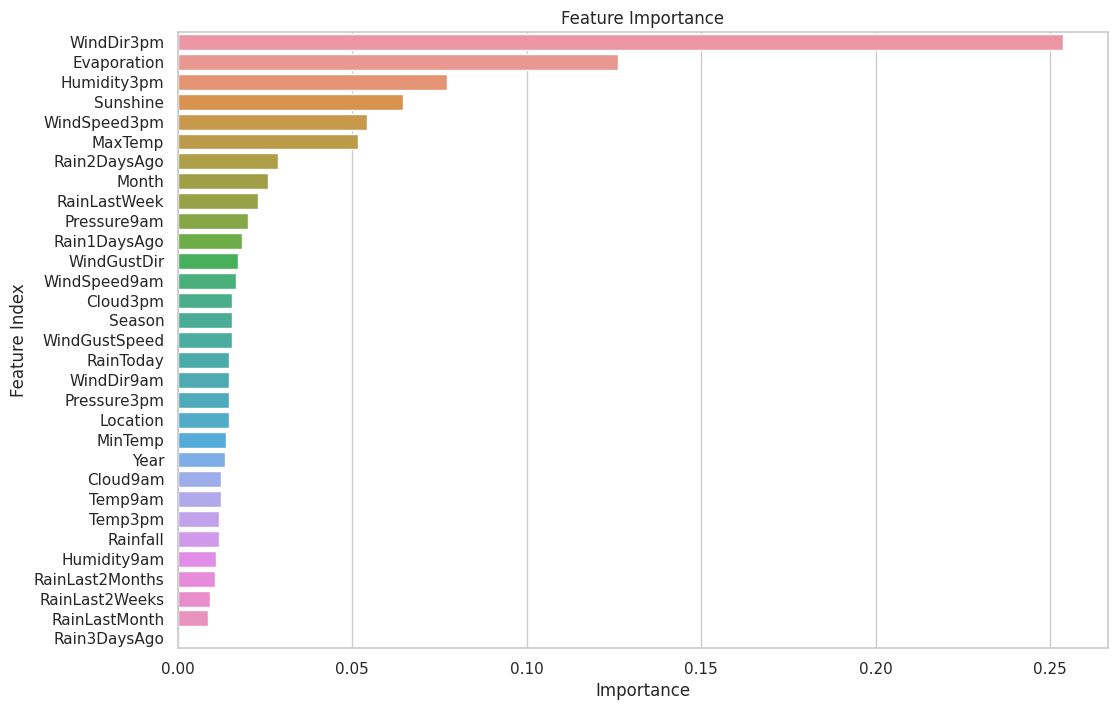

In [ ]:
# Obtenim les importàncies de les característiques
feature_importances = xgb_best_model.feature_importances_

# Si no coneixem els noms de les característiques, utilitzem índexs numèrics
feature_names = X.columns  #CAL ELIMINAR EL PCA DE LA PIPELINE PER TAL DE TENIR ELS NOMS DE LES COLUMNES.

# Creem un DataFrame per a millor visualització
features = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Ordenem les característiques per importància
features = features.sort_values(by='Importance', ascending=False)

# Visualització de la importància de les característiques
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=features)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature Index')
plt.show()


A la gràfica de la importància de les característiques, podem veure que les variables relacionades amb la direcció del vent a les 3PM (WindDir3pm), l'evaporació, la humitat a les 3PM (Humidity3pm), i la llum solar (Sunshine) són les més influents en la predicció de pluja per al dia següent. Aquestes característiques tenen la major importància dins del model i, per tant, són claus en la seva capacitat per fer prediccions precises.

Ara em plantejo, però, una pregunta. Per què precisament la velocitat del vent a les 3 de la tarda és la variable amb més importància pel model?

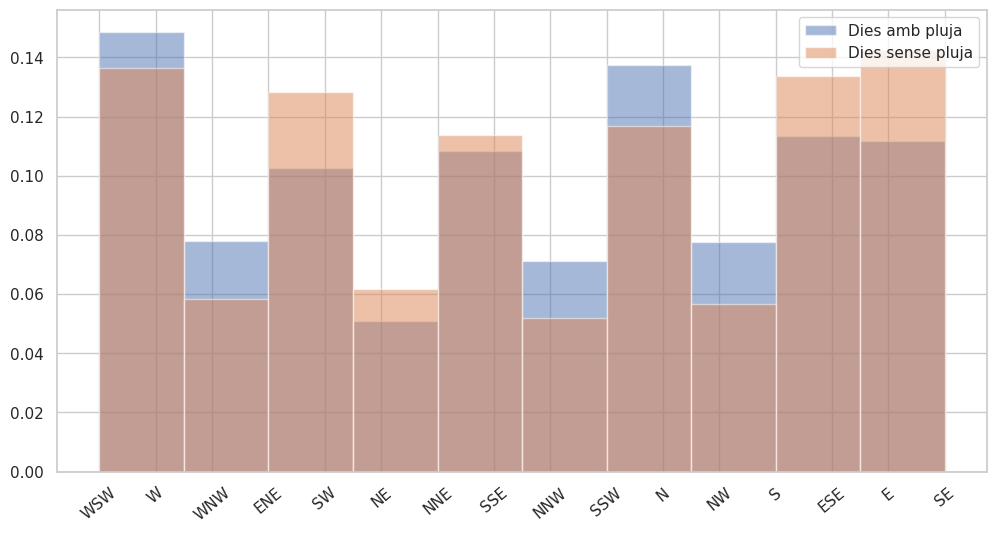

In [ ]:
plt.figure(figsize=(12,6))
plt.hist(df_netejat[df_netejat[target]=='Yes']['WindDir3pm'], weights=np.ones(len(df_netejat[df_netejat[target]=='Yes']))/len(df_netejat[df_netejat[target]=='Yes']), alpha=0.5, label='Dies amb pluja')
plt.hist(df_netejat[df_netejat[target]=='No']['WindDir3pm'], weights=np.ones(len(df_netejat[df_netejat[target]=='No']))/len(df_netejat[df_netejat[target]=='No']), alpha=0.5,  label='Dies sense pluja')
plt.legend(loc='upper right')
plt.xticks(rotation=40)
plt.show()

Analitzant la temporada: Spring
Resultats del test chi-quadrat: Chi2 = 233.29677856258436, p-valor = 3.3689889053913206e-41



<ipython-input-78-7ffd8066eb08>:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.bar(wind_dir, df_season[df_season['WindDir3pm'] == wind_dir][df_season['RainTomorrow'] == 'Yes'].shape[0], alpha=0.5, label='Dies amb pluja' if i == 0 else "")
<ipython-input-78-7ffd8066eb08>:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.bar(wind_dir, df_season[df_season['WindDir3pm'] == wind_dir][df_season['RainTomorrow'] == 'No'].shape[0], alpha=0.5, label='Dies sense pluja' if i == 0 else "")


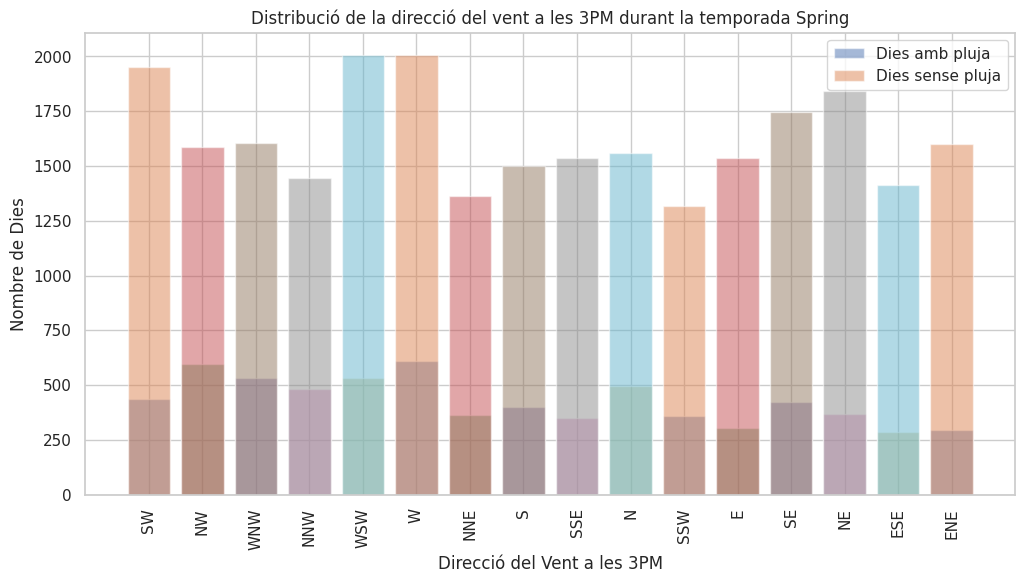

Analitzant la temporada: Summer
Resultats del test chi-quadrat: Chi2 = 297.82979822929786, p-valor = 1.5786715285809386e-54



<ipython-input-78-7ffd8066eb08>:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.bar(wind_dir, df_season[df_season['WindDir3pm'] == wind_dir][df_season['RainTomorrow'] == 'Yes'].shape[0], alpha=0.5, label='Dies amb pluja' if i == 0 else "")
<ipython-input-78-7ffd8066eb08>:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.bar(wind_dir, df_season[df_season['WindDir3pm'] == wind_dir][df_season['RainTomorrow'] == 'No'].shape[0], alpha=0.5, label='Dies sense pluja' if i == 0 else "")


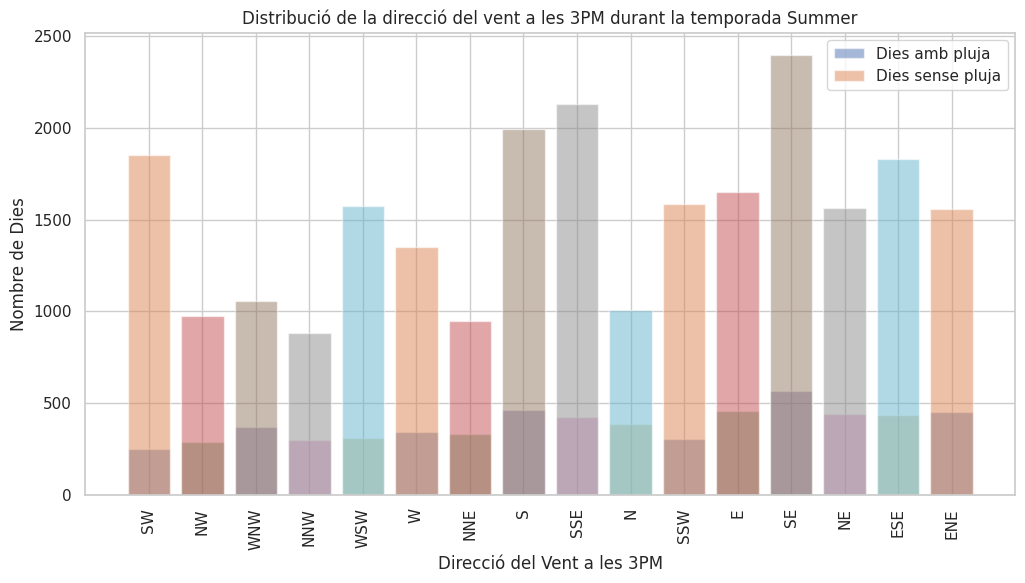

Analitzant la temporada: Autumn
Resultats del test chi-quadrat: Chi2 = 270.9268940658285, p-valor = 5.954865067273923e-49



<ipython-input-78-7ffd8066eb08>:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.bar(wind_dir, df_season[df_season['WindDir3pm'] == wind_dir][df_season['RainTomorrow'] == 'Yes'].shape[0], alpha=0.5, label='Dies amb pluja' if i == 0 else "")
<ipython-input-78-7ffd8066eb08>:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.bar(wind_dir, df_season[df_season['WindDir3pm'] == wind_dir][df_season['RainTomorrow'] == 'No'].shape[0], alpha=0.5, label='Dies sense pluja' if i == 0 else "")


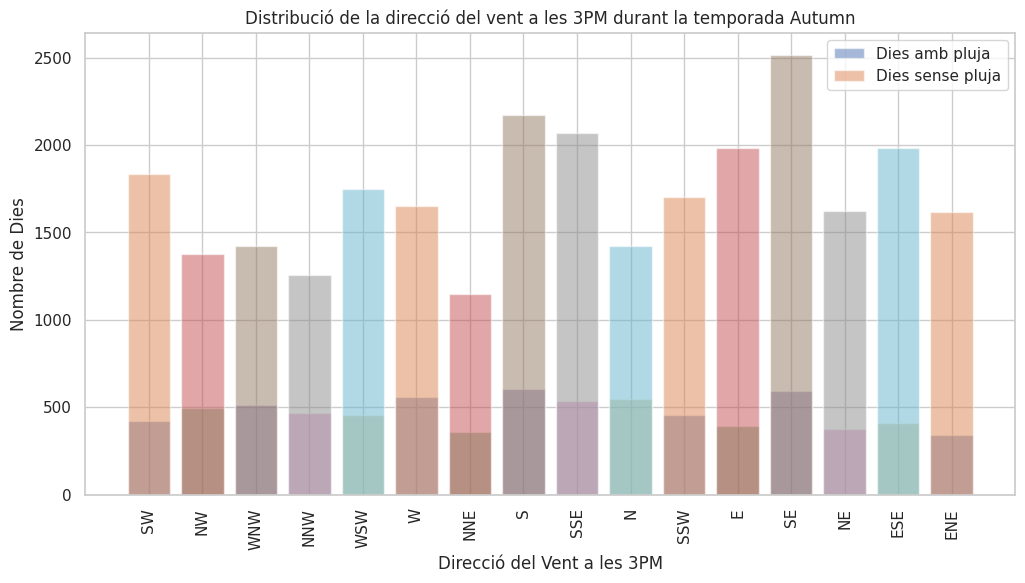

Analitzant la temporada: Winter
Resultats del test chi-quadrat: Chi2 = 693.9143290498621, p-valor = 3.683557384947179e-138



<ipython-input-78-7ffd8066eb08>:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.bar(wind_dir, df_season[df_season['WindDir3pm'] == wind_dir][df_season['RainTomorrow'] == 'Yes'].shape[0], alpha=0.5, label='Dies amb pluja' if i == 0 else "")
<ipython-input-78-7ffd8066eb08>:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.bar(wind_dir, df_season[df_season['WindDir3pm'] == wind_dir][df_season['RainTomorrow'] == 'No'].shape[0], alpha=0.5, label='Dies sense pluja' if i == 0 else "")


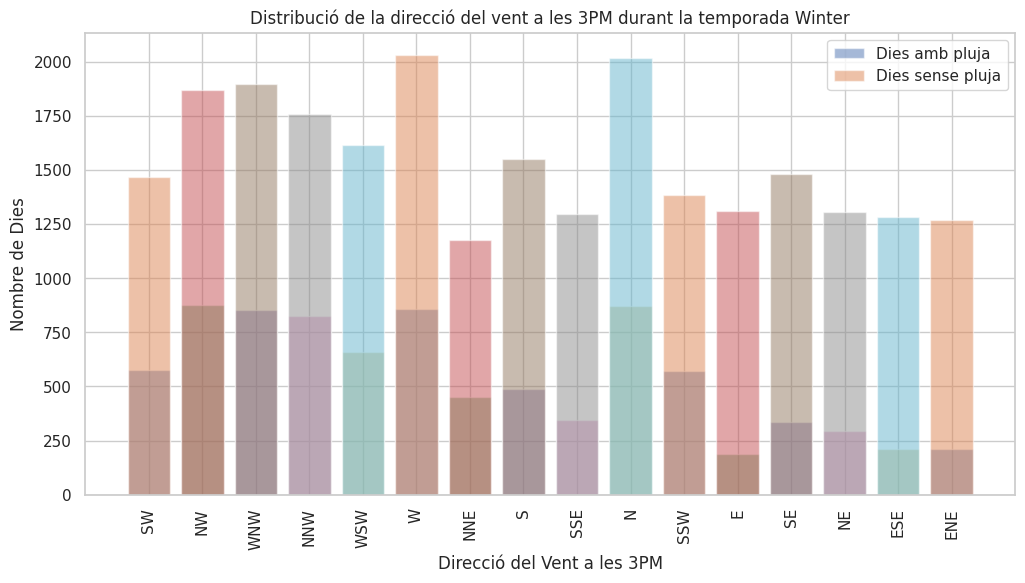

In [ ]:
from scipy.stats import chi2_contingency

# Aquesta funció calcularà i visualitzarà la distribució de la direcció del vent per a dies de pluja i no pluja
def analyze_wind_direction(df):
    seasons = df['Season'].unique()  # Obtenim les estacions úniques
    wind_directions = df['WindDir3pm'].unique()  # Obtenim les direccions del vent úniques

    for season in seasons:
        print(f"Analitzant la temporada: {season}")
        df_season = df[df['Season'] == season]

        # Creem una taula de contingència per a cada direcció del vent i si va ploure o no
        contingency_table = pd.crosstab(df_season['WindDir3pm'], df_season['RainTomorrow'])

        # Realitzem la prova chi-quadrat
        chi2, p, dof, expected = chi2_contingency(contingency_table)

        print(f"Resultats del test chi-quadrat: Chi2 = {chi2}, p-valor = {p}\n")

        # Visualitzem la distribució de la direcció del vent per a dies plujosos i no plujosos
        plt.figure(figsize=(12, 6))
        for i, wind_dir in enumerate(wind_directions):
            plt.bar(wind_dir, df_season[df_season['WindDir3pm'] == wind_dir][df_season['RainTomorrow'] == 'Yes'].shape[0], alpha=0.5, label='Dies amb pluja' if i == 0 else "")
            plt.bar(wind_dir, df_season[df_season['WindDir3pm'] == wind_dir][df_season['RainTomorrow'] == 'No'].shape[0], alpha=0.5, label='Dies sense pluja' if i == 0 else "")

        plt.xticks(rotation=90)
        plt.title(f"Distribució de la direcció del vent a les 3PM durant la temporada {season}")
        plt.xlabel('Direcció del Vent a les 3PM')
        plt.ylabel('Nombre de Dies')
        plt.legend()
        plt.show()

# Finalment, cridem la funció amb el nostre dataframe
analyze_wind_direction(df_netejat)


Analitzant els gràfics, podem fer algunes observacions generals:

- **Variabilitat Estacional:** Hi ha diferències en la distribució de la direcció del vent entre les estacions. Això pot indicar que els patrons de vent que porten a la pluja varien segons la temporada.

- **Distribució de la Direcció del Vent:** Alguns vents com els de direccions SW (sud-oest) i NW (nord-oest) semblen més freqüents en dies plujosos en algunes estacions, suggerint una possible correlació entre aquestes direccions del vent i la pluja.

- **Significació Estadística:** Els resultats dels tests chi-quadrat per cada gràfic mostren p-valors extremadament baixos, indicant que les diferències observades en la distribució de la direcció del vent entre dies plujosos i no plujosos són estadísticament significatives.

Es podria investigar el context meteorològic associat amb les direccions del vent que mostren una major correlació amb la pluja. Per exemple, els vents del SW podrien estar associats amb l'arribada de sistemes de baixa pressió que porten pluja, mentre que altres direccions podrien estar relacionades amb condicions més seques.

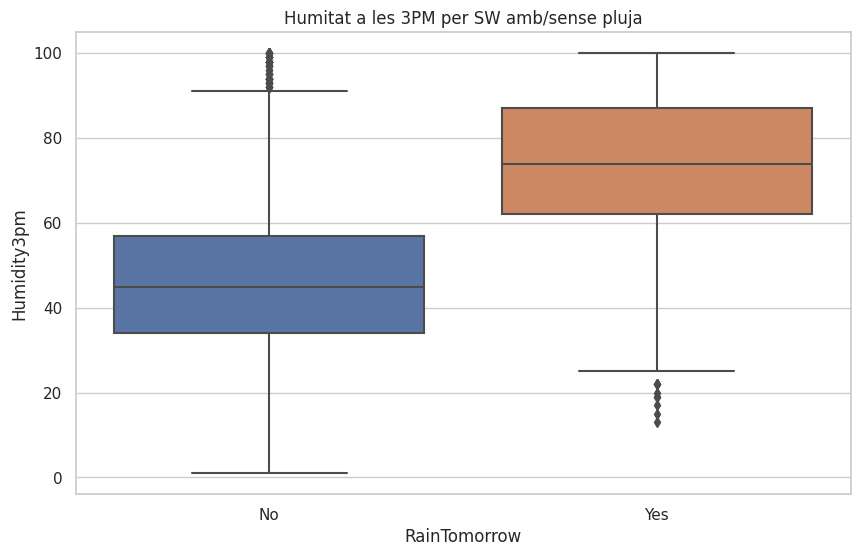

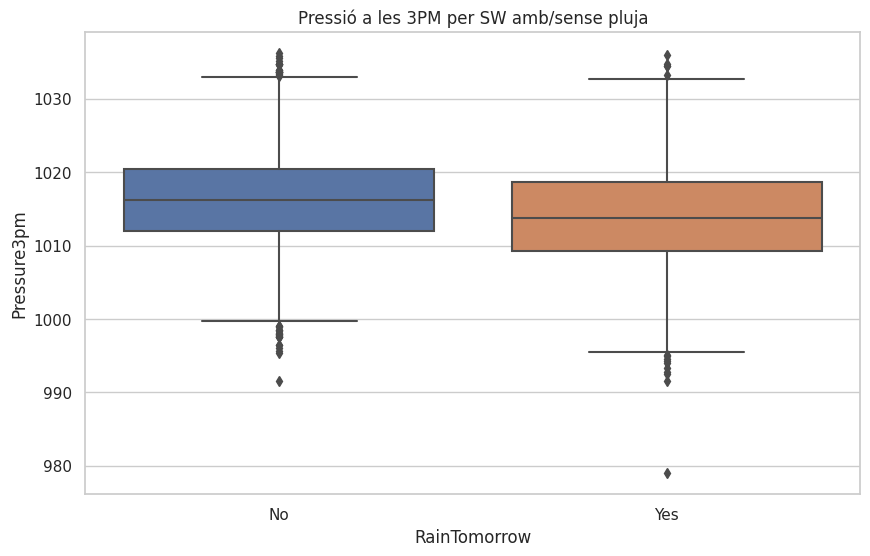

       Humidity3pm  Pressure3pm      Temp3pm
count  8792.000000  8198.000000  8792.000000
mean     50.960760  1015.861722    20.019506
std      20.605987     6.391598     6.755946
min       1.000000   979.000000    -3.900000
25%      37.000000  1011.500000    15.100000
50%      50.000000  1015.800000    19.100000
75%      64.000000  1020.200000    24.200000
max     100.000000  1036.200000    45.300000
             Humidity3pm  Pressure3pm   Temp3pm
Humidity3pm     1.000000     0.141662 -0.655308
Pressure3pm     0.141662     1.000000 -0.431682
Temp3pm        -0.655308    -0.431682  1.000000


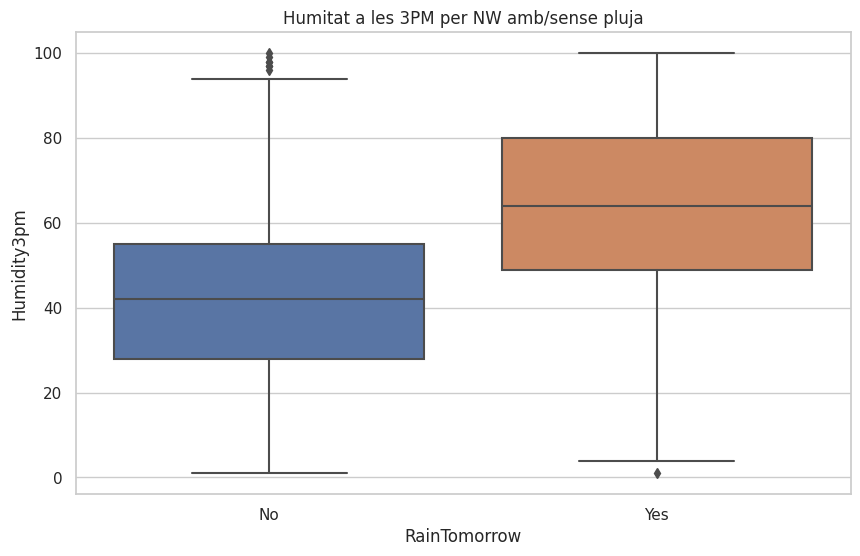

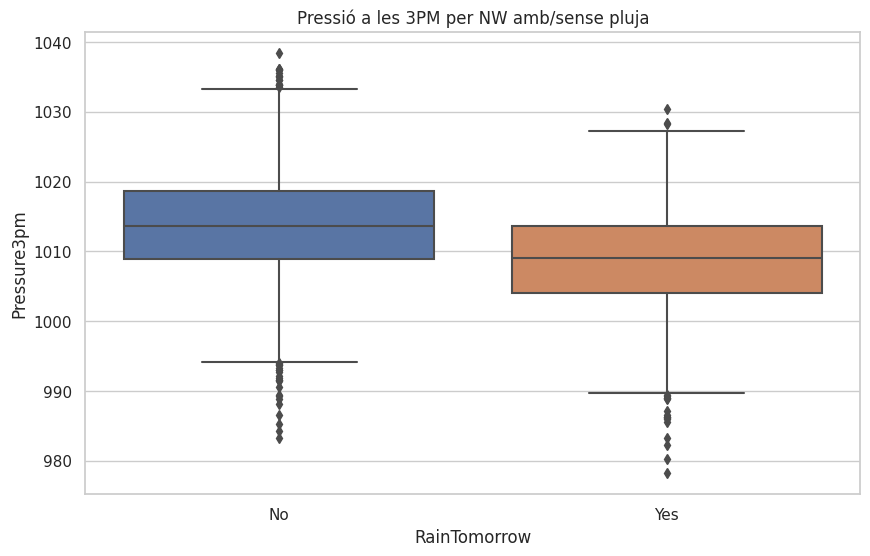

       Humidity3pm  Pressure3pm      Temp3pm
count  8060.000000  6914.000000  8060.000000
mean     47.788213  1012.329346    21.481030
std      21.632801     7.609502     7.637919
min       1.000000   978.200000    -2.300000
25%      32.000000  1007.400000    15.700000
50%      47.000000  1012.200000    20.100000
75%      62.000000  1017.400000    27.000000
max     100.000000  1038.400000    46.700000
             Humidity3pm  Pressure3pm   Temp3pm
Humidity3pm     1.000000     0.014733 -0.644686
Pressure3pm     0.014733     1.000000 -0.217207
Temp3pm        -0.644686    -0.217207  1.000000


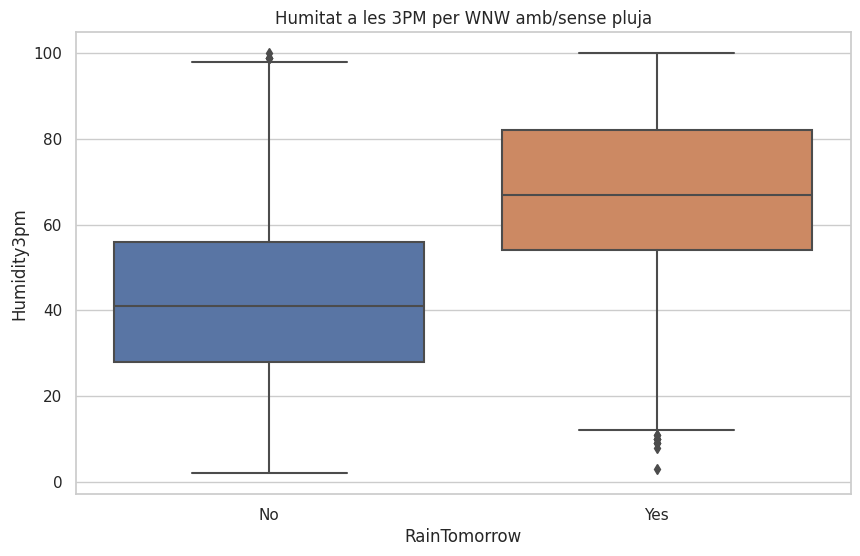

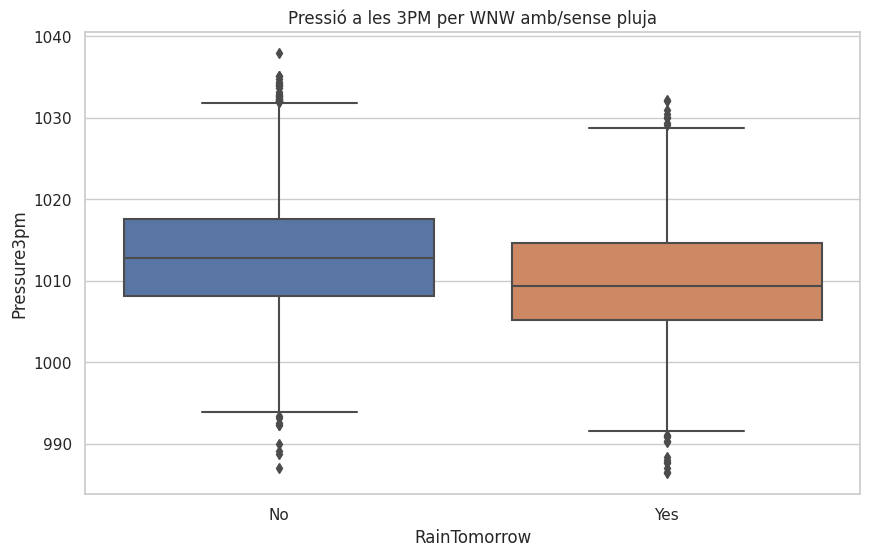

       Humidity3pm  Pressure3pm      Temp3pm
count  8245.000000  7379.000000  8245.000000
mean     48.769800  1012.151023    20.946986
std      21.833989     7.057766     7.788726
min       2.000000   986.400000    -5.100000
25%      32.000000  1007.100000    15.300000
50%      48.000000  1011.900000    19.500000
75%      64.000000  1016.900000    26.300000
max     100.000000  1037.900000    46.200000
             Humidity3pm  Pressure3pm   Temp3pm
Humidity3pm     1.000000     0.070305 -0.590596
Pressure3pm     0.070305     1.000000 -0.302210
Temp3pm        -0.590596    -0.302210  1.000000


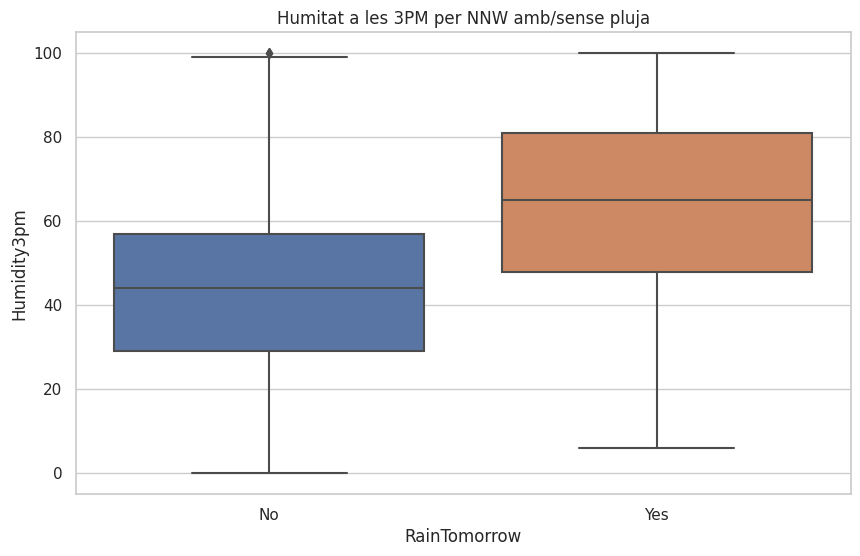

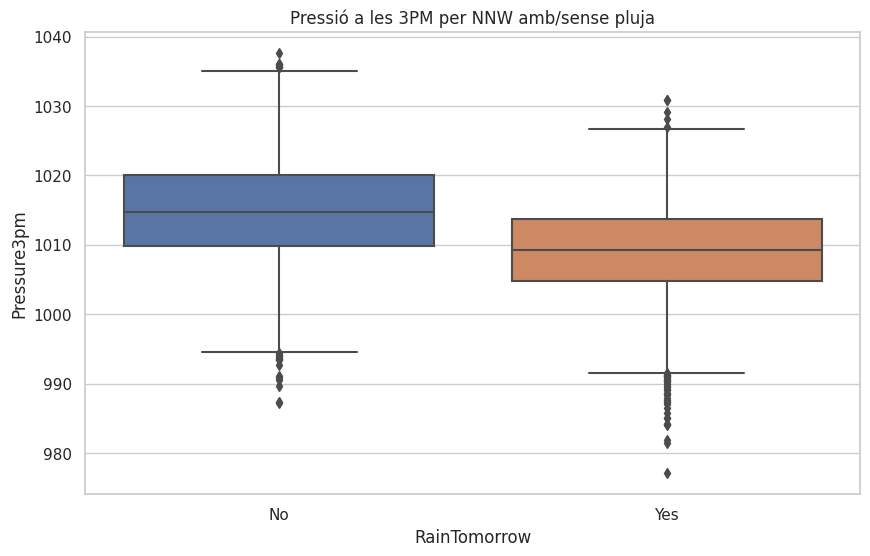

       Humidity3pm  Pressure3pm      Temp3pm
count  7417.000000  6638.000000  7417.000000
mean     48.937711  1013.323245    21.602804
std      21.774691     7.703873     7.806357
min       0.000000   977.100000    -0.300000
25%      33.000000  1008.300000    15.300000
50%      49.000000  1013.100000    20.200000
75%      64.000000  1018.500000    27.800000
max     100.000000  1037.600000    44.800000
             Humidity3pm  Pressure3pm   Temp3pm
Humidity3pm     1.000000    -0.032999 -0.659363
Pressure3pm    -0.032999     1.000000 -0.283665
Temp3pm        -0.659363    -0.283665  1.000000


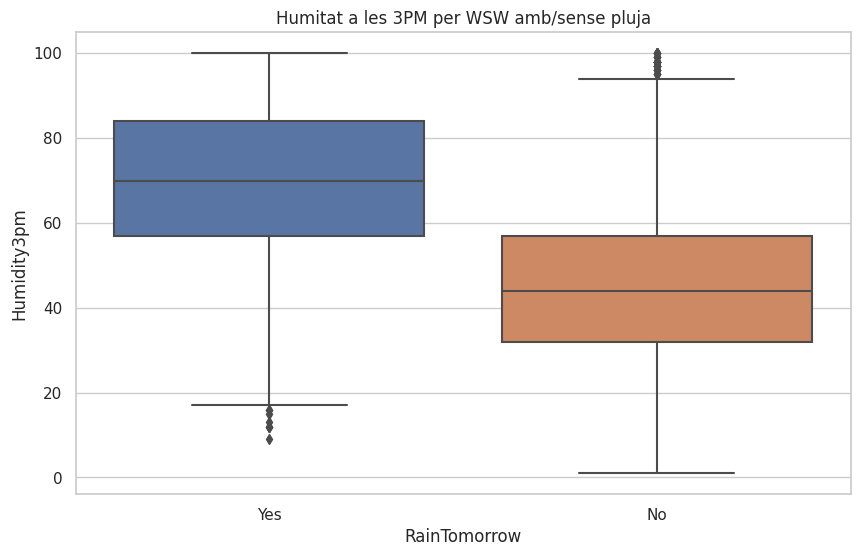

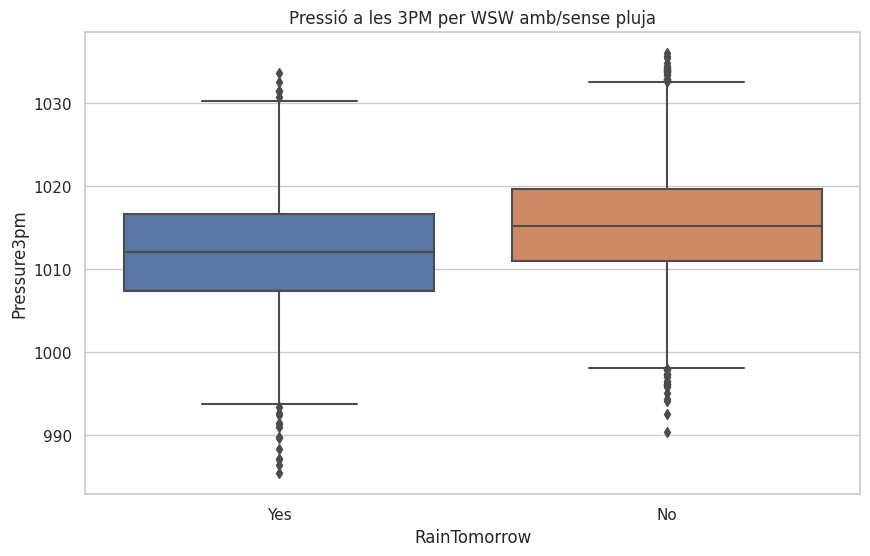

       Humidity3pm  Pressure3pm      Temp3pm
count  8898.000000  8365.000000  8898.000000
mean     50.125421  1014.601925    19.913475
std      20.865137     6.592871     7.267489
min       1.000000   985.400000    -5.400000
25%      35.000000  1010.100000    14.900000
50%      49.000000  1014.600000    18.600000
75%      64.000000  1018.900000    24.200000
max     100.000000  1036.000000    43.900000
             Humidity3pm  Pressure3pm   Temp3pm
Humidity3pm     1.000000     0.112513 -0.674845
Pressure3pm     0.112513     1.000000 -0.326124
Temp3pm        -0.674845    -0.326124  1.000000


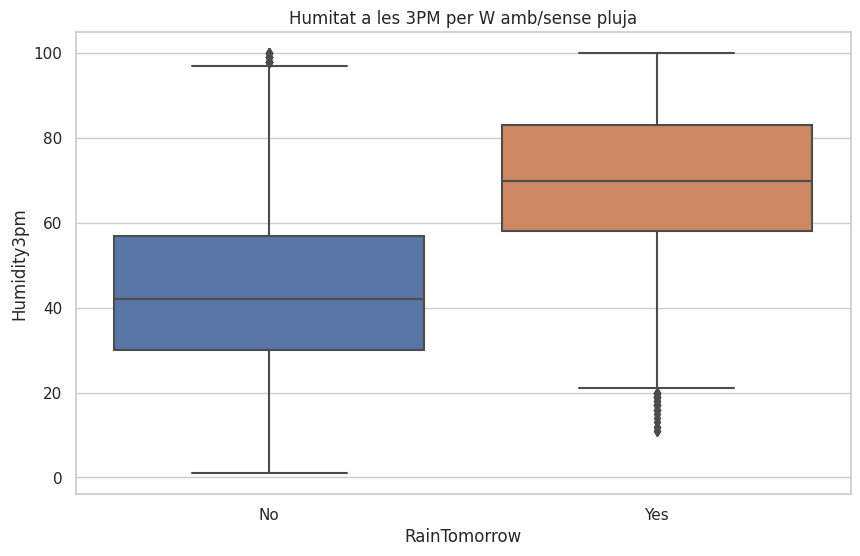

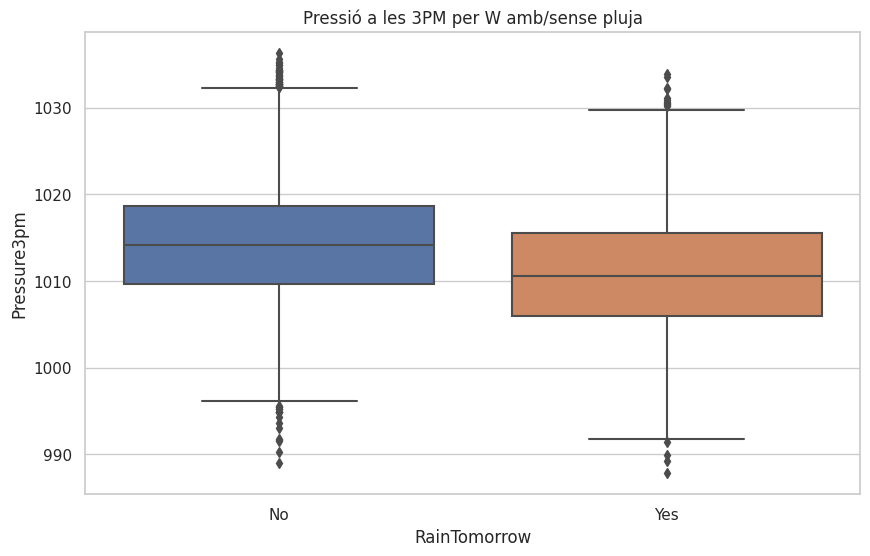

       Humidity3pm  Pressure3pm      Temp3pm
count  9418.000000  8500.000000  9418.000000
mean     50.056275  1013.407906    19.822659
std      21.634751     6.996860     7.461625
min       1.000000   987.800000    -4.200000
25%      34.000000  1008.600000    14.700000
50%      49.000000  1013.300000    18.600000
75%      65.000000  1018.000000    24.200000
max     100.000000  1036.300000    45.900000
             Humidity3pm  Pressure3pm   Temp3pm
Humidity3pm     1.000000     0.102249 -0.665891
Pressure3pm     0.102249     1.000000 -0.286455
Temp3pm        -0.665891    -0.286455  1.000000


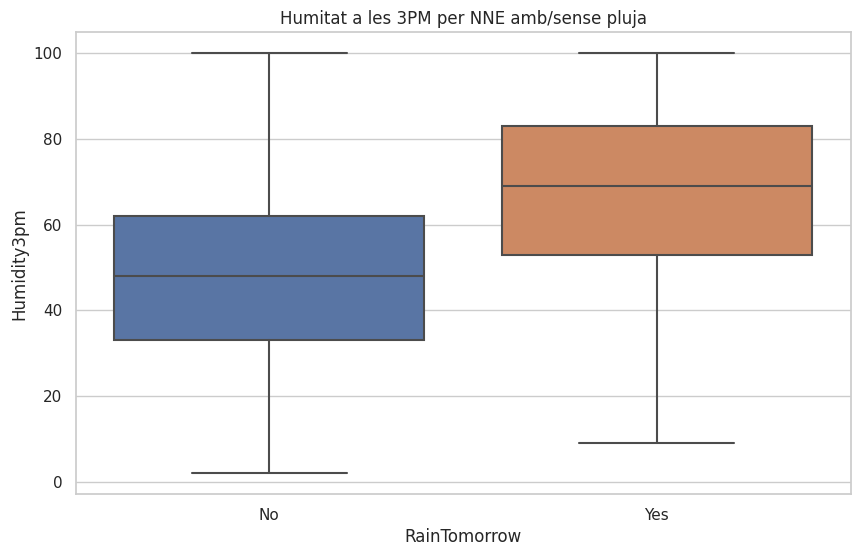

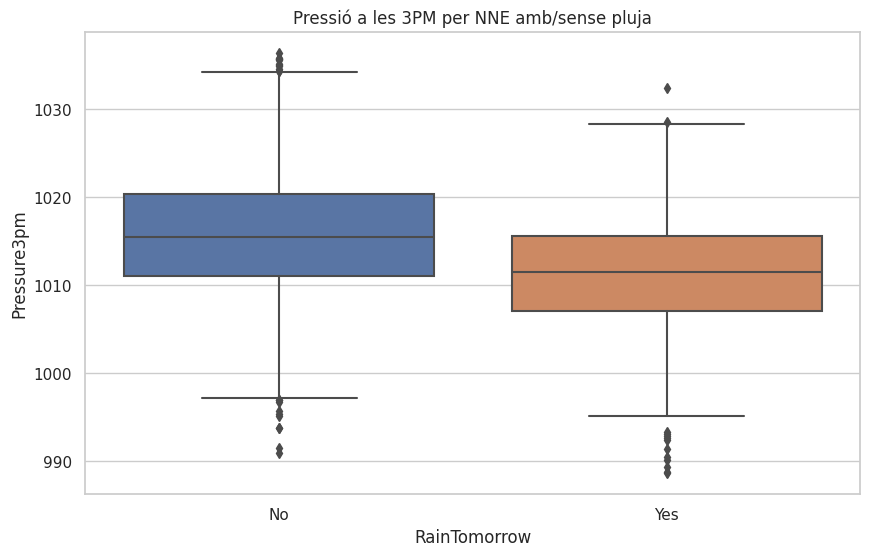

       Humidity3pm  Pressure3pm      Temp3pm
count   6129.00000  5622.000000  6129.000000
mean      52.21488  1014.654714    23.248295
std       20.97431     6.824642     6.527775
min        2.00000   988.600000     0.000000
25%       37.00000  1010.000000    18.500000
50%       53.00000  1014.500000    23.200000
75%       67.00000  1019.300000    27.900000
max      100.00000  1036.400000    43.000000
             Humidity3pm  Pressure3pm   Temp3pm
Humidity3pm     1.000000    -0.141498 -0.492682
Pressure3pm    -0.141498     1.000000 -0.388006
Temp3pm        -0.492682    -0.388006  1.000000


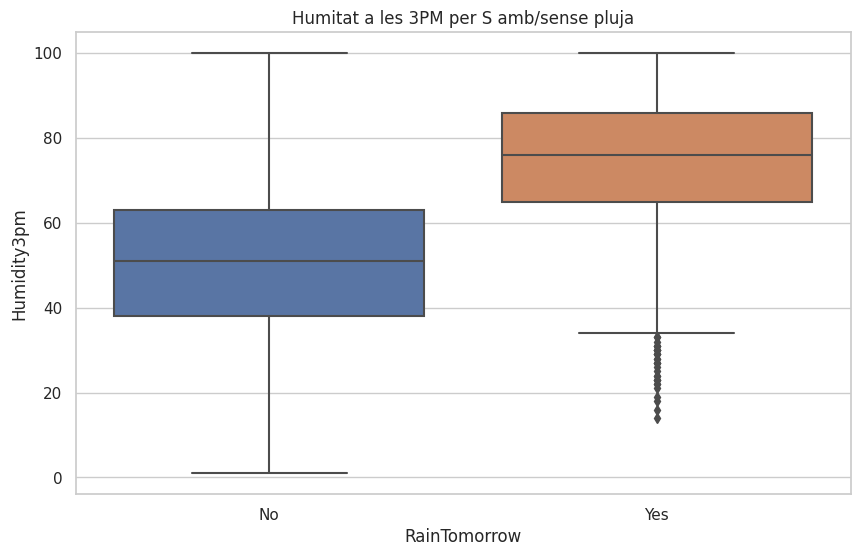

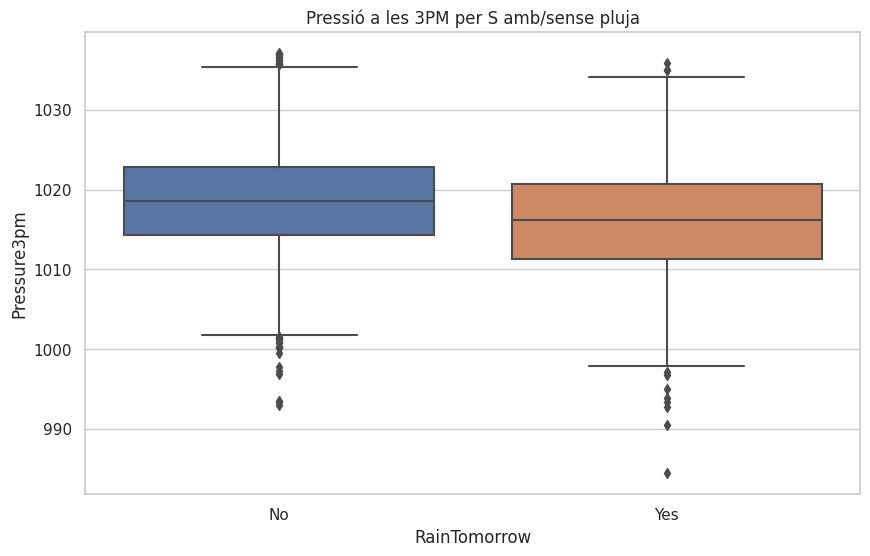

       Humidity3pm  Pressure3pm      Temp3pm
count  9167.000000  8600.000000  9167.000000
mean     55.155122  1018.033198    20.001342
std      20.108742     6.510615     5.774908
min       1.000000   984.400000    -1.700000
25%      41.000000  1013.700000    16.000000
50%      55.000000  1018.100000    19.400000
75%      69.000000  1022.400000    23.300000
max     100.000000  1037.100000    44.700000
             Humidity3pm  Pressure3pm   Temp3pm
Humidity3pm     1.000000     0.032348 -0.519527
Pressure3pm     0.032348     1.000000 -0.482649
Temp3pm        -0.519527    -0.482649  1.000000


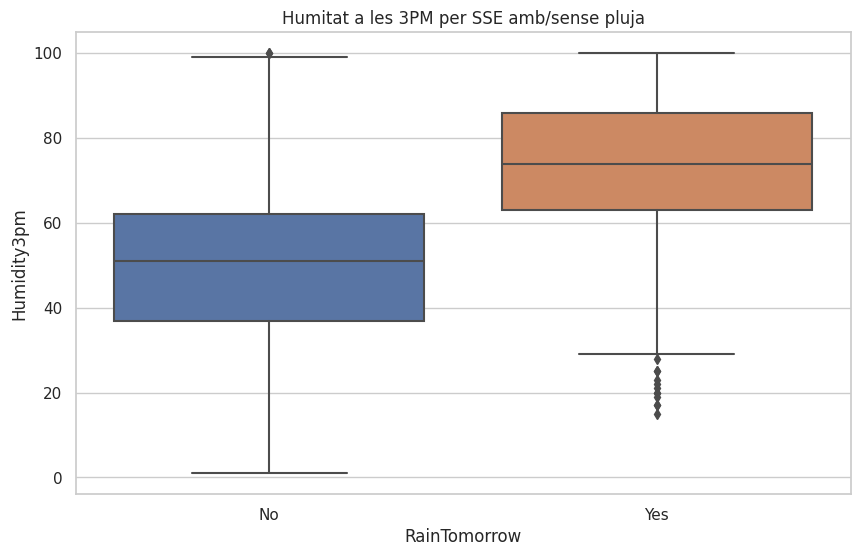

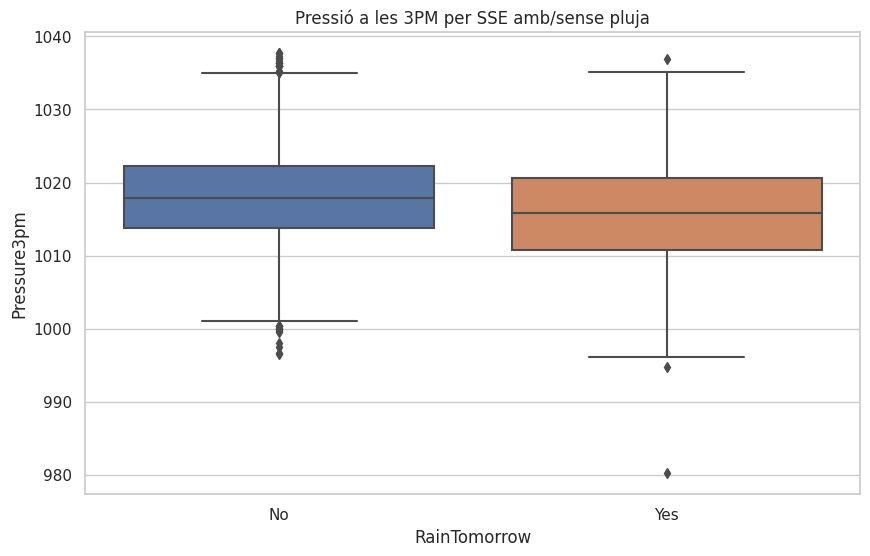

       Humidity3pm  Pressure3pm      Temp3pm
count  8683.000000  8152.000000  8683.000000
mean     53.685017  1017.670309    21.162513
std      19.934116     6.481102     5.888205
min       1.000000   980.200000    -2.900000
25%      41.000000  1013.300000    17.200000
50%      55.000000  1017.500000    20.800000
75%      67.000000  1022.025000    24.600000
max     100.000000  1037.700000    42.000000
             Humidity3pm  Pressure3pm   Temp3pm
Humidity3pm     1.000000     0.037521 -0.507471
Pressure3pm     0.037521     1.000000 -0.527609
Temp3pm        -0.507471    -0.527609  1.000000


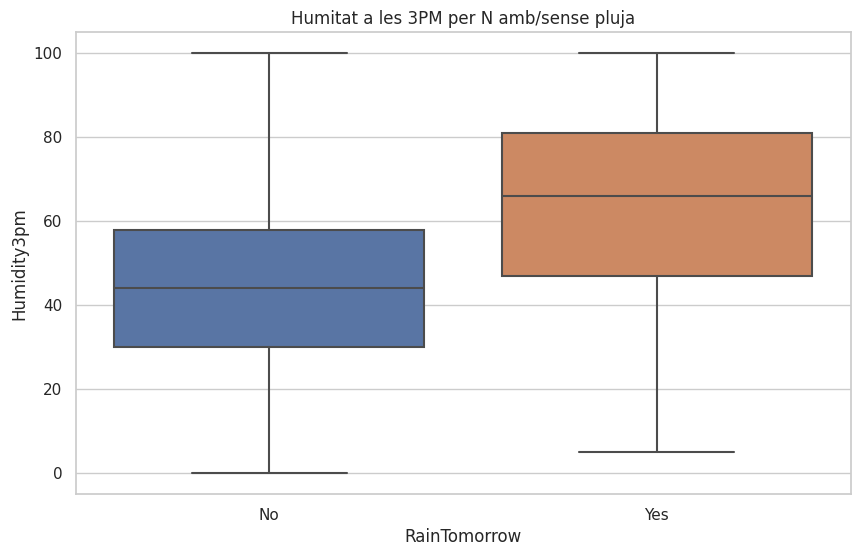

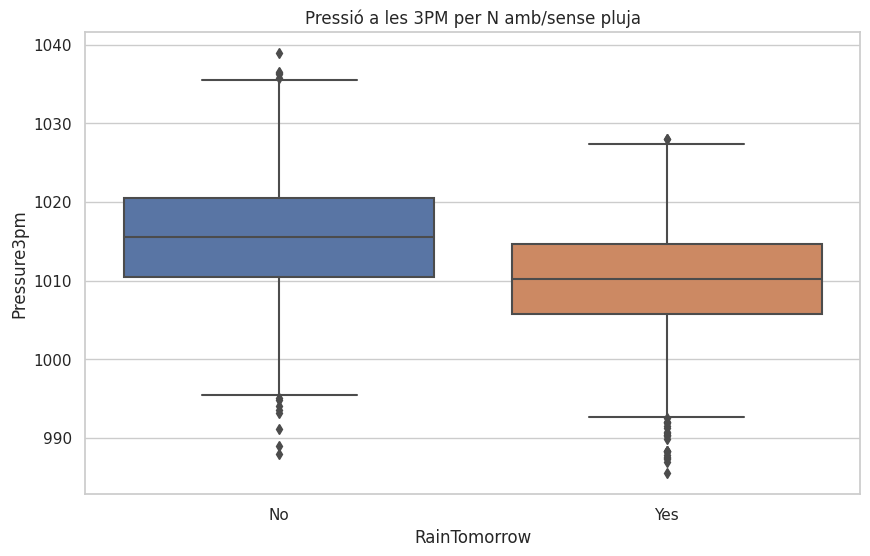

       Humidity3pm  Pressure3pm      Temp3pm
count  8311.000000  7708.000000  8311.000000
mean     49.787150  1014.011463    22.065335
std      21.920073     7.353174     7.486534
min       0.000000   985.500000     2.800000
25%      33.000000  1009.000000    16.200000
50%      49.000000  1014.000000    21.300000
75%      66.000000  1019.100000    27.800000
max     100.000000  1038.900000    45.000000
             Humidity3pm  Pressure3pm   Temp3pm
Humidity3pm     1.000000    -0.069960 -0.605145
Pressure3pm    -0.069960     1.000000 -0.327659
Temp3pm        -0.605145    -0.327659  1.000000


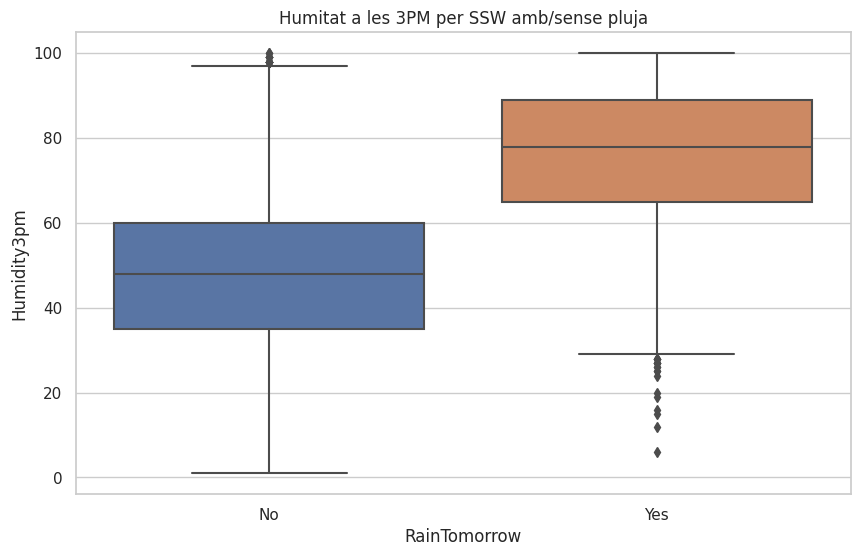

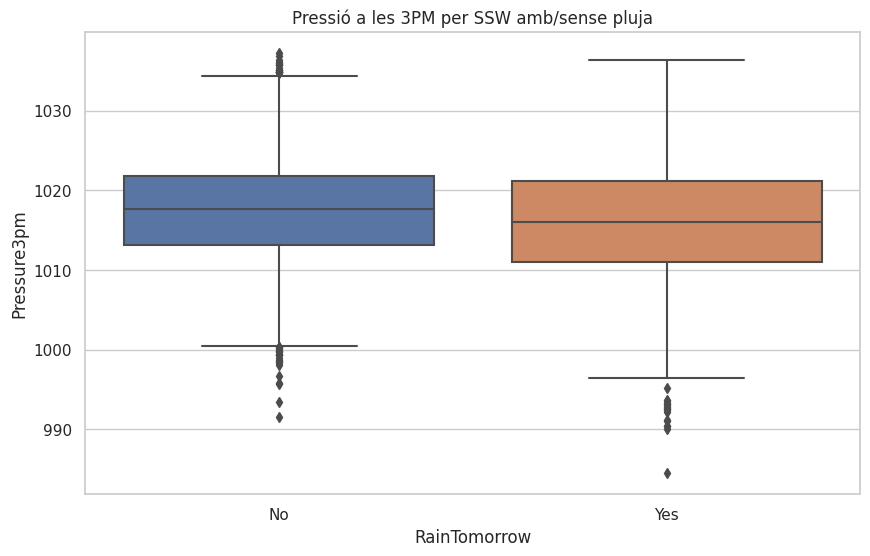

       Humidity3pm  Pressure3pm      Temp3pm
count  7679.000000  7140.000000  7679.000000
mean     53.991926  1017.189132    19.675270
std      21.302280     6.700793     6.354239
min       1.000000   984.500000    -2.000000
25%      39.000000  1012.600000    15.000000
50%      53.000000  1017.400000    18.600000
75%      69.000000  1021.700000    23.500000
max     100.000000  1037.200000    43.000000
             Humidity3pm  Pressure3pm   Temp3pm
Humidity3pm     1.000000     0.101729 -0.620882
Pressure3pm     0.101729     1.000000 -0.454792
Temp3pm        -0.620882    -0.454792  1.000000


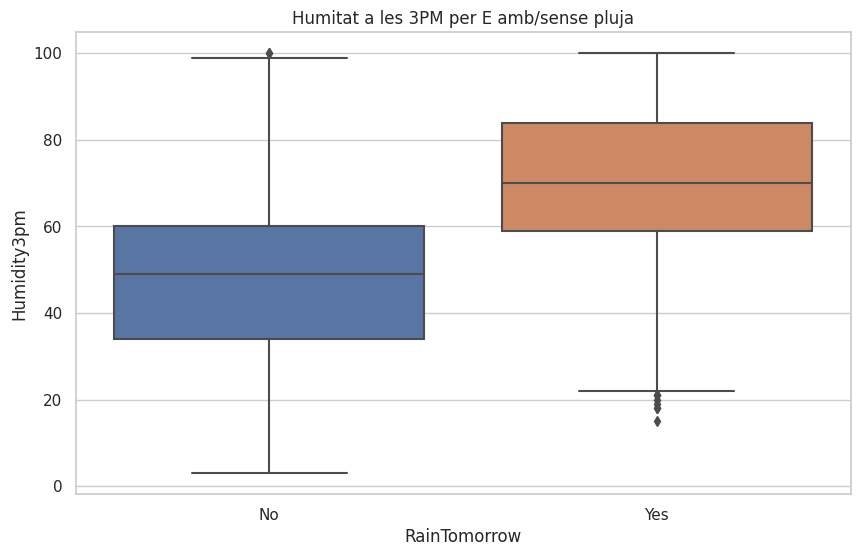

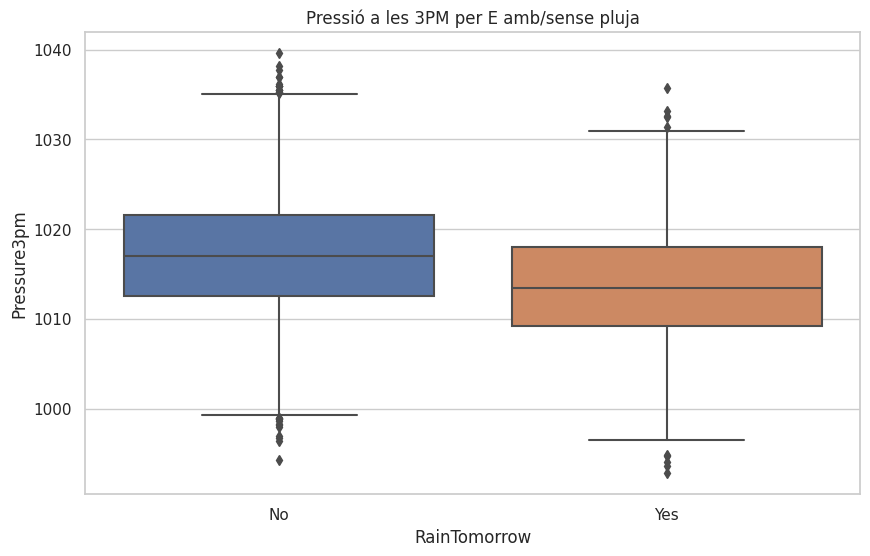

       Humidity3pm  Pressure3pm      Temp3pm
count  7824.000000  7343.000000  7824.000000
mean     50.998722  1016.624336    23.596178
std      19.746955     6.597701     6.243166
min       3.000000   992.800000     0.000000
25%      37.000000  1011.900000    19.400000
50%      52.000000  1016.400000    23.600000
75%      64.000000  1021.200000    27.800000
max     100.000000  1039.600000    44.700000
             Humidity3pm  Pressure3pm   Temp3pm
Humidity3pm     1.000000     0.035570 -0.529828
Pressure3pm     0.035570     1.000000 -0.578977
Temp3pm        -0.529828    -0.578977  1.000000


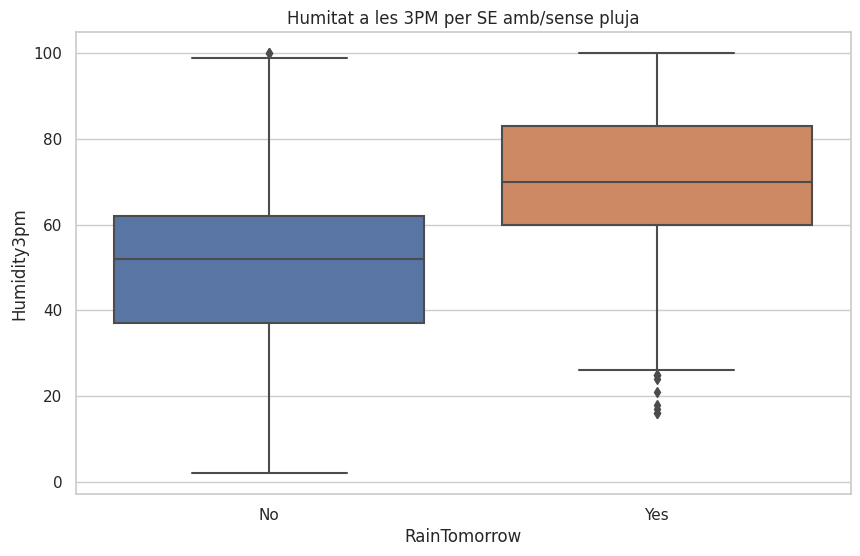

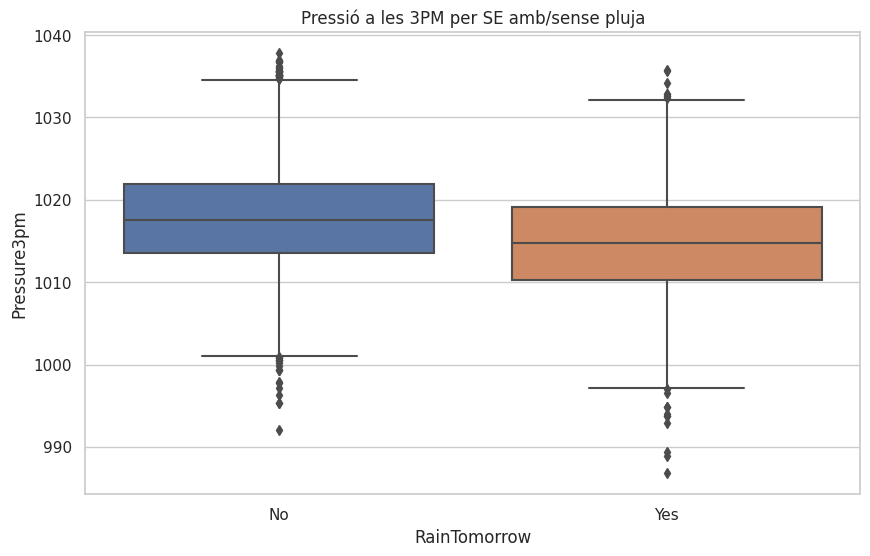

        Humidity3pm  Pressure3pm       Temp3pm
count  10060.000000  8799.000000  10060.000000
mean      53.184493  1017.215047     22.396461
std       19.145171     6.424883      5.712100
min        2.000000   986.800000     -1.300000
25%       41.000000  1012.900000     18.300000
50%       55.000000  1017.100000     22.200000
75%       65.000000  1021.500000     26.200000
max      100.000000  1037.800000     43.200000
             Humidity3pm  Pressure3pm   Temp3pm
Humidity3pm     1.000000     0.023859 -0.459878
Pressure3pm     0.023859     1.000000 -0.548899
Temp3pm        -0.459878    -0.548899  1.000000


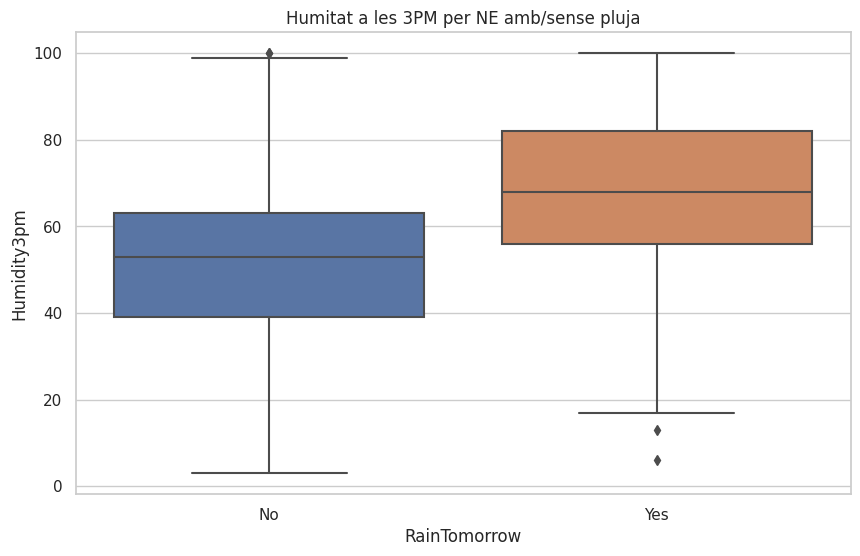

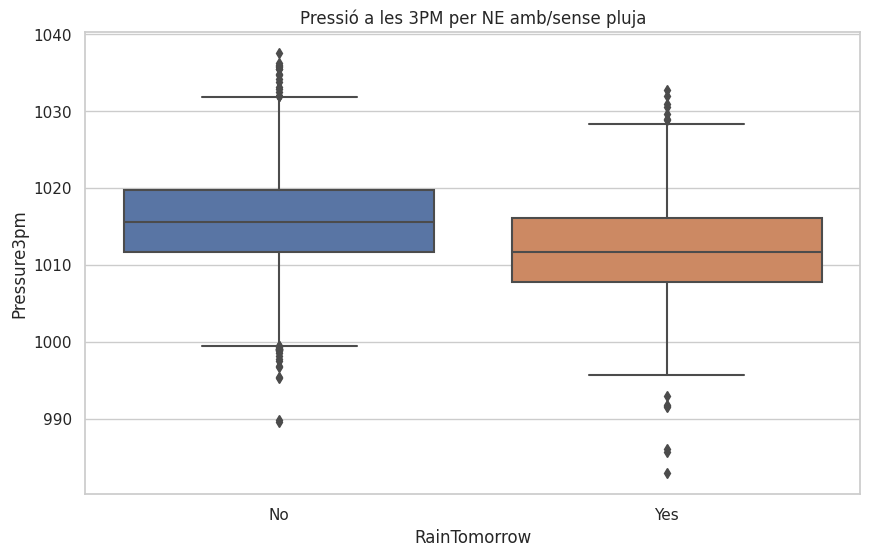

       Humidity3pm  Pressure3pm      Temp3pm
count  7817.000000  7131.000000  7817.000000
mean     54.050531  1014.991120    24.112486
std      18.621675     6.287801     5.686680
min       3.000000   982.900000     0.300000
25%      42.000000  1010.700000    20.400000
50%      55.000000  1014.900000    24.300000
75%      67.000000  1019.100000    27.900000
max     100.000000  1037.500000    42.500000
             Humidity3pm  Pressure3pm   Temp3pm
Humidity3pm     1.000000    -0.113022 -0.421870
Pressure3pm    -0.113022     1.000000 -0.464689
Temp3pm        -0.421870    -0.464689  1.000000


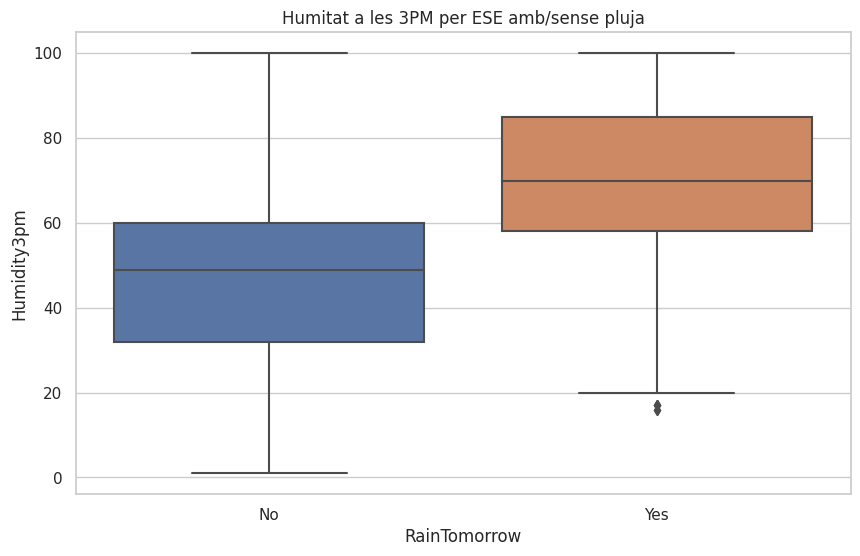

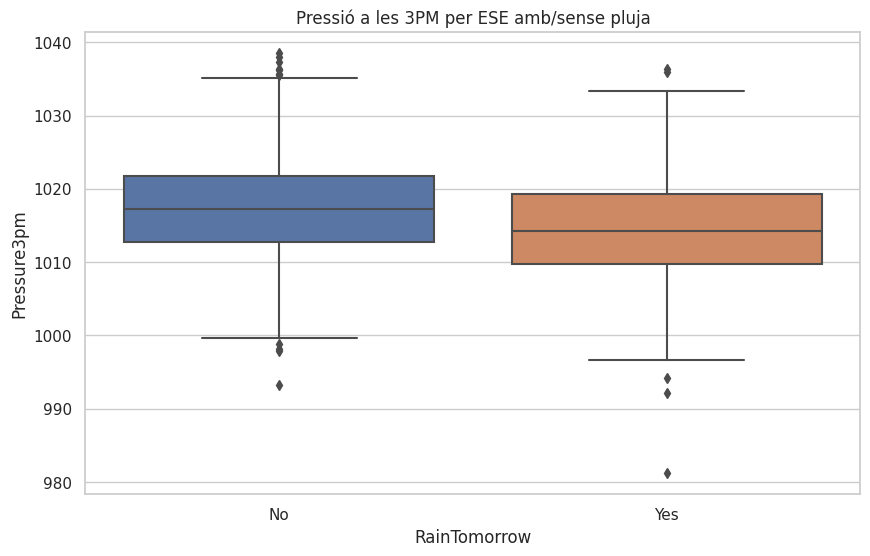

       Humidity3pm  Pressure3pm      Temp3pm
count  7853.000000  7402.000000  7853.000000
mean     50.402267  1016.877965    23.219470
std      20.306899     6.533220     6.207079
min       1.000000   981.200000    -1.900000
25%      36.000000  1012.200000    18.800000
50%      52.000000  1016.700000    23.000000
75%      64.000000  1021.400000    27.300000
max     100.000000  1038.500000    42.600000
             Humidity3pm  Pressure3pm   Temp3pm
Humidity3pm     1.000000     0.072202 -0.523663
Pressure3pm     0.072202     1.000000 -0.602383
Temp3pm        -0.523663    -0.602383  1.000000


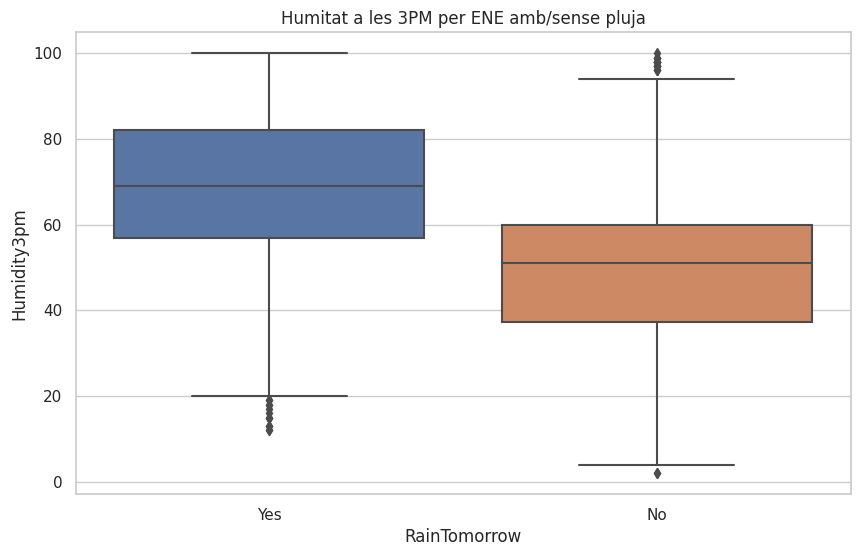

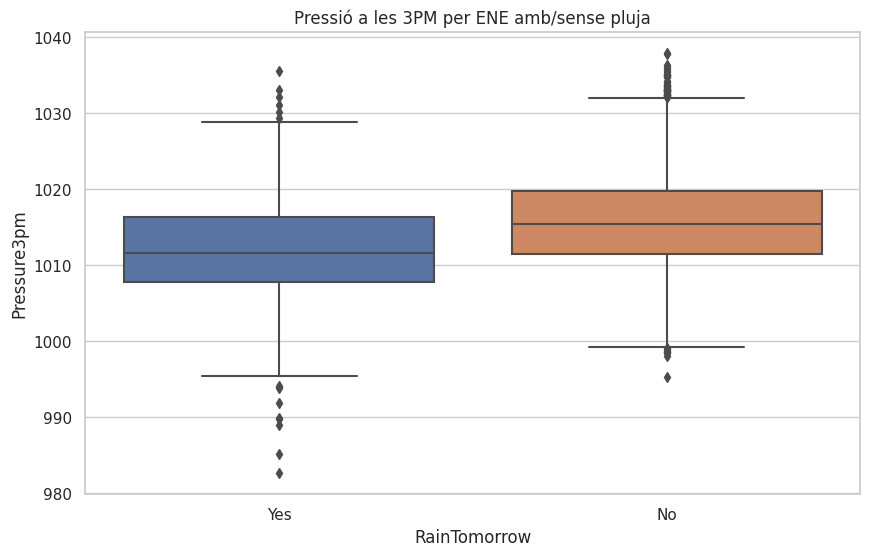

       Humidity3pm  Pressure3pm      Temp3pm
count  7346.000000  6894.000000  7346.000000
mean     51.915464  1015.180954    24.774980
std      18.783814     6.355050     6.066695
min       2.000000   982.600000    -1.500000
25%      40.000000  1010.800000    20.800000
50%      53.000000  1014.900000    25.300000
75%      64.000000  1019.200000    29.100000
max     100.000000  1037.900000    44.000000
             Humidity3pm  Pressure3pm   Temp3pm
Humidity3pm     1.000000    -0.073671 -0.462433
Pressure3pm    -0.073671     1.000000 -0.533010
Temp3pm        -0.462433    -0.533010  1.000000


In [ ]:
from scipy import stats

# 1. Anàlisi de Condicions Atmosfèriques Associades amb la Direcció del Vent
def analyze_conditions(df, wind_direction):
    df_wind = df[df['WindDir3pm'] == wind_direction]

    # 2. Calcular Estadístiques Descriptives
    descriptive_stats = df_wind[['Humidity3pm', 'Pressure3pm', 'Temp3pm']].describe()

    # 3. Crear Visualitzacions
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_wind, x='RainTomorrow', y='Humidity3pm')
    plt.title(f'Humitat a les 3PM per {wind_direction} amb/sense pluja')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_wind, x='RainTomorrow', y='Pressure3pm')
    plt.title(f'Pressió a les 3PM per {wind_direction} amb/sense pluja')
    plt.show()

    # 4. Analitzar Tendències Temporals (aquesta part és més complexa i requereix més dades)

    # 5. Anàlisi de Correlació
    correlation = df_wind[['Humidity3pm', 'Pressure3pm', 'Temp3pm']].corr()

    # Mostrar estadístiques descriptives i correlació
    print(descriptive_stats)
    print(correlation)

    # Això es repetiria per a cada direcció del vent que vulguis analitzar.
    # Per a l'anàlisi completa hauries de cridar aquesta funció amb cada direcció del vent d'interès.

# Exemple de crida a la funció per a una direcció del vent concreta
# analyze_conditions(df, 'N')

# Per fer l'anàlisi per a totes les direccions del vent, podríem utilitzar un bucle:
for direction in df_netejat['WindDir3pm'].unique():
    analyze_conditions(df_netejat, direction)

Podem fer algunes observacions clau:

- **Humitat:** Hi ha una diferència notable entre els dies amb pluja i sense en termes de humitat. Els dies que van precedir la pluja mostren nivells més alts de humitat en comparació amb els dies sense pluja, independentment de la direcció del vent. Això és consistent amb la comprensió que una humitat més alta pot ser un indicador de la probabilitat de pluja.

- **Pressió Atmosfèrica:** La pressió atmosfèrica presenta una variació notable entre els dies amb pluja i sense pluja. En general, els dies que van precedir la pluja tendeixen a tenir una pressió més baixa, el que suggereix l'apropament d'un sistema de baixa pressió, el qual sovint està associat amb condicions de pluja.

- **Variació segons la Direcció del Vent:** Quan es considera la direcció del vent, els gràfics mostren que tant la humitat com la pressió varien d'una manera que podria estar relacionada amb la probabilitat de pluja. Per exemple, els vents SW i WNW podrien portar més humitat o estar associats amb sistemes de baixa pressió que afavoreixen la pluja.

- **Distribució de les Dades:** Els gràfics de caixa també mostren una àmplia dispersió en les dades, particularment en els nivells de pressió per alguns vents com WNW i NNW. Això podria indicar que hi ha altres factors que també influeixen en la precipitació, o que la relació entre la pressió atmosfèrica i la pluja no és tan directa.

A Austràlia, com en moltes altres regions del món, els vents del sud-oest (SW) i oest-nord-oest (WNW) poden estar associats amb l'arribada de sistemes frontals que porten aire més fred i humit des de l'oceà. Aquests sistemes frontals sovint són els responsables de la formació de núvols i la posterior precipitació.

En l'hemisferi sud, els vents que bufen de l'oest (els vents dels 'roaring forties' per exemple) són notoris per ser humits i portar temps inestable a causa de la seva trajectòria sobre grans extensions d'oceà. Això pot resultar en una major probabilitat de pluja quan aquests vents arriben a terra.

D'altra banda, la pressió atmosfèrica baixa sovint indica l'apropament de sistemes de tempestes i fronts que poden resultar en precipitacions significatives. Així que és raonable suposar que a Austràlia, com en molts llocs, vents de direccions SW i WNW puguin estar relacionats amb condicions que afavoreixen la pluja, particularment si aquests vents provenen de l'oceà i porten aire humit cap a terra.

In [ ]:
ref_point = [1, 1]

# Calculem la distància euclidiana entre el punt de referència i cada punt de la corba PR utilitzant les llistes precision i recall
distances = [np.sqrt((precision[i] - ref_point[0])**2 + (recall[i] - ref_point[1])**2) for i in range(len(precision))]
closest_index = np.argmin(distances)

closest_point = [precision[closest_index], recall[closest_index]]  # Coordenades del punt més proper
closest_threshold = thresholds[closest_index] if closest_index < len(thresholds) else 1.0  # El threshold pot ser 1 si estem en l'últim punt

print(f"El punt més proper a (1, 1) a la corba PR és {closest_point} amb threshold {closest_threshold:.2f}")


El punt més proper a (1, 1) a la corba PR és [0.6299625468164795, 0.7231298366294067] amb threshold 0.31


El punt més proper a (1,1) en la corba PR té una precisió d'aproximadament 0.61 i un recall d'aproximadament 0.71, amb un llindar associat de 0.31. Això significa que ajustant el llindar de decisió del model a 0.31, s'obtindrien aquestes estimacions de precisió i recall.

Per tant, ara ja sabem que el millor threshold és 0.31. Ara ja podem trobar la f1_score a partir d'aquest threshold.

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

prec,rec,f1, sup = precision_recall_fscore_support(y_test,y_prob[:, 1]>0.31)

print(prec,rec,f1, sup)

[0.91672994 0.6332574 ] [0.88233861 0.71711092] [0.89920556 0.67258065] [20525  5815]


- **Precisió:** 0.91 per la classe negativa i 0.61 per la classe positiva.
- **Recall:** 0.87 per la classe negativa i 0.71 per la classe positiva.
- **Puntuació F1:** 0.89 per la classe negativa i 0.66 per la classe positiva.
- **Suport:** 20525 casos per la classe negativa i 5815 casos per la classe positiva.

Aquestes mètriques suggereixen que el model té un rendiment millor en la detecció de la classe negativa en comparació amb la classe positiva, com es reflecteix en una major precisió, recall i puntuació F1. El suport indica el nombre de mostres reals per a cada classe.

[[19454  1071]
 [ 2587  3228]]


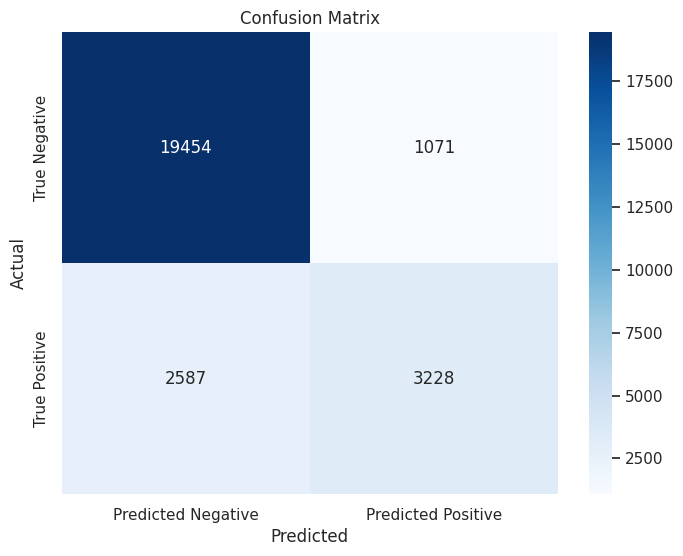

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Visualització de la matriu de confusió
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['True Negative', 'True Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

- **Veritables negatius (True Negative, TN):** 19424
- **Falsos positius (False Positive, FP):** 1101
- **Falsos negatius (False Negative, FN):** 2753
- **Veritables positius (True Positive, TP):** 3062

La matriu de confusió mostra la quantitat de prediccions correctes i incorrectes del model. Un nombre elevat de veritables negatius indica que el model és bo en predir la classe negativa, mentre que el nombre més baix de veritables positius mostra que el model té més dificultats per identificar correctament la classe positiva. Els falsos positius i els falsos negatius mostren les instàncies en què el model s'ha equivocat, predint incorrectament la presència o absència de la característica d'interès, respectivament.

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

       False       0.88      0.95      0.91     20525
        True       0.75      0.56      0.64      5815

    accuracy                           0.86     26340
   macro avg       0.82      0.75      0.78     26340
weighted avg       0.85      0.86      0.85     26340



Aquestes dades indiquen que el model és més precís i té un major recall per la classe negativa, cosa que significa que és més eficient per detectar dies sense pluja. La classe positiva té una precisió més baixa i un recall significativament més baix, indicant que el model té més dificultats per identificar correctament els dies amb pluja. L'alta exactitud general ens diu que el model funciona bé en el conjunt global de dades, però pot haver-hi un biaix cap a la classe més representada.

# **FINAL CONCLUSIONS**

El model XGBClassifier ha demostrat un rendiment notable en la tasca de predicció de pluja, amb una exactitud general de l'86%. Això indica que en la majoria dels casos, el model pot distingir correctament entre dies de pluja i dies sense pluja.

El model tendeix a tenir un millor rendiment a l’hora de predir la classe negativa (dies sense pluja), com ho demostren la precisió del 88% i el recall del 95%. La classe positiva (dies amb pluja), en canvi, té una precisió del 75% i un recall més baix del 56%, resultant en una F1-Score del 64%. Això és probablement a causa de la gran quantitat de dies no plujosos del dataset (78%) en front dels dies plujosos (21%).

La corba PR (Precision-Recall) i la seva AUPRC de 0.72 proporcionen una visió més matissada del rendiment del model, especialment en el context d'un conjunt de dades desequilibrat. La corba mostra la compensació entre precisió i recall a diferents llindars, ajudant a identificar un llindar òptim per a les prediccions del model.

L'anàlisi de la matriu de confusió confirma les tendències observades en les mètriques de rendiment, mostrant una quantitat significativa de falsos negatius, el que reafirma la dificultat del model per capturar tots els dies de pluja reals.

L'anàlisi de la importància de les característiques revela que La direcció del vent a les 3PM, l’evaporació, la humitat a les 3PM i la llum solar són les variables que tenen més influència en les decisions del model. Les direccions del vent SW i WNW a les 3PM semblen tenir relació amb l'augment de la humitat i la disminució de la pressió atmosfèrica, dos indicadors clau de la probabilitat de pluja al dia següent. De fet, coincideixen en ser els que mostren una certa predominància en els dies amb pluja durant l’estació humida a Austràlia (de finals de primavera a finals d’estiu).
